# Qualitative comparison of the elemental abundance ratios of the bar, inner disc, and knot given the GMM fit in L

In [1]:
# new less restrictive sample selection
# # create the parent mask
# mask = (data['SNR']>50)&(data['LOGG']<3.)&(data['LOGG']>0.)&(data['TEFF']>3500.)&(data['TEFF']<5500.)&(data['ASPCAPFLAG']==0)\
#     &(data['weighted_dist']/data['weighted_dist_error']>10)&(data['EXTRATARG']==0)&(mask_gcs==False) & (mask_gcs2==False)\
#     &(rads<5)&(data['age']>0)&(data['age']<14)&(data['LOGG_ERR']<0.2)&(data['fakemag']<500)

# print('There are '+str(len(data[mask]))+' stars in the parent sample')

# np.savetxt('/Users/dhortadarrington/Desktop/new_inner_gal_sample',data['APOGEE_ID_1'][mask],fmt='%s')

In [419]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from astropy.io import fits
import tqdm
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
import nmmn.plots
import vorbin
wolfram=nmmn.plots.wolframcmap() # for Mathematica's cmap
parula=nmmn.plots.parulacmap() # for MATLAB's cmap
turbo=nmmn.plots.turbocmap() # Turbo
import warnings
warnings.filterwarnings('ignore')

In [420]:
# LOAD THE DATA
# this is the latest APOGEE catalogue that APW sent me with orbital properties determined using StarHorse distances
path1 = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/bar-prob-big-0-1-cyl.fits'
tb1 = fits.open(path1)
data1 = tb1[1].data 

path2 = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/bar-prob-big-1-2-cyl.fits'
tb2 = fits.open(path2)
data2 = tb2[1].data 

path3 = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/bar-prob-big-2-3-cyl.fits'
tb3 = fits.open(path3)
data3 = tb3[1].data 

path4 = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/bar-prob-big-3-4-cyl.fits'
tb4 = fits.open(path4)
data4 = tb4[1].data 


In [421]:
mask_knot1 = data1['P_knot']>0.8
mask_bar1 = data1['P_bar']>0.8
mask_disc1 = data1['P_disc']>0.8

mask_knot2 = data2['P_knot']>0.8
mask_bar2 = data2['P_bar']>0.8
mask_disc2 = data2['P_disc']>0.8

mask_knot3 = data3['P_knot']>0.8
mask_bar3 = data3['P_bar']>0.8
mask_disc3 = data3['P_disc']>0.8

mask_knot4 = data4['P_knot']>0.8
mask_bar4 = data4['P_bar']>0.8
mask_disc4 = data4['P_disc']>0.8

# Calculate the contour containing 1-sigma of the distribution for each bin in radius and each component

In [422]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    Returns
    -------
    matplotlib.patches.Ellipse

    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

(array([14.,  9., 10., 30., 36., 40., 21., 10., 11., 17.]),
 array([-0.81106272, -0.64830484, -0.48554695, -0.32278907, -0.16003119,
         0.0027267 ,  0.16548458,  0.32824247,  0.49100035,  0.65375823,
         0.81651612]),
 <BarContainer object of 10 artists>)

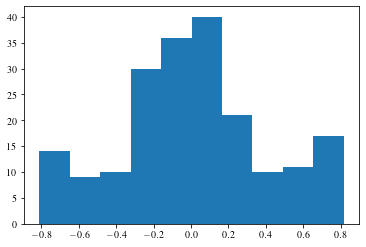

In [423]:
plt.hist(data1['Y_1'][mask_knot1])


In [424]:
# join x and y for the knot
x_all = np.concatenate((data1['X_1'],data2['X_1']))
x_all = np.concatenate((x_all,data3['X_1']))
x_all = np.concatenate((x_all,data4['X_1']))

y_all = np.concatenate((data1['Y_1'],data2['Y_1']))
y_all = np.concatenate((y_all,data3['Y_1']))
y_all = np.concatenate((y_all,data4['Y_1']))

z_all = np.concatenate((data1['Z_1'],data2['Z_1']))
z_all = np.concatenate((z_all,data3['Z_1']))
z_all = np.concatenate((z_all,data4['Z_1']))

In [425]:
# def spherical_to_cartesian_positions(phi,theta,r):
#     cosp,sinp,cost,sint = np.cos(phi),np.sin(phi),np.cos(theta),np.sin(theta)
#     x = r*sint*cosp
#     y = r*sint*sinp
#     z = r*cost
#     return np.array([x,y,z])

# def spherical_to_cartesian_velocities(phi,theta,vr,vphi,vtheta):
#     cosp,sinp,cost,sint = np.cos(phi),np.sin(phi),np.cos(theta),np.sin(theta)
#     vx = sint*cosp*vr + cost*cosp*vtheta - sinp*vphi
#     vy = sint*sinp*vr + cost*sinp*vtheta + cosp*vphi
#     vz = cost     *vr - sint     *vtheta
#     return np.array([vx,vy,vz])

In [429]:
def get_L(x,y,z,phi,vr,vp,vzeta,Rg):
    
    vR = vr*220.
    vphi = vp*220.
    vz = vzeta*220.
    Rgal = Rg*8.178
    theta = np.arctan(z/x)
    
    vx = (x*vR - y*vphi)/Rgal
    vy = (y*vR + x*vphi)/Rgal
    vz = vzeta
    
    lx = y*vz - z*vy
    ly = z*vx - x*vz
    lz = x*vy - y*vx
    
    return lx, ly, lz


In [430]:
lx1, ly1, lz1 = get_L(data1['X_1'],data1['Y_1'],data1['Z_1'],data1['phi'],data1['vR'],data1['vT'],data1['vZ_2a'],data1['Rgal'])
lx2, ly2, lz2 = get_L(data2['X_1'],data2['Y_1'],data2['Z_1'],data2['phi'],data2['vR'],data2['vT'],data2['vZ_2a'],data2['Rgal'])
lx3, ly3, lz3 = get_L(data3['X_1'],data3['Y_1'],data3['Z_1'],data3['phi'],data3['vR'],data3['vT'],data3['vZ_2a'],data3['Rgal'])
lx4, ly4, lz4 = get_L(data4['X_1'],data4['Y_1'],data4['Z_1'],data4['phi'],data4['vR'],data4['vT'],data4['vZ_2a'],data4['Rgal'])


In [431]:
# join x and y for the knot
x_all = np.concatenate((data1['X_1'],data2['X_1']))
x_all = np.concatenate((x_all,data3['X_1']))
x_all = np.concatenate((x_all,data4['X_1']))

y_all = np.concatenate((data1['Y_1'],data2['Y_1']))
y_all = np.concatenate((y_all,data3['Y_1']))
y_all = np.concatenate((y_all,data4['Y_1']))

z_all = np.concatenate((data1['Z_1'],data2['Z_1']))
z_all = np.concatenate((z_all,data3['Z_1']))
z_all = np.concatenate((z_all,data4['Z_1']))

In [432]:
# join x and y for the knot
lx_all = np.concatenate((lx1,lx2))
lx_all = np.concatenate((lx_all,lx3))
lx_all = np.concatenate((lx_all,lx4))

ly_all = np.concatenate((ly1,ly2))
ly_all = np.concatenate((ly_all,ly3))
ly_all = np.concatenate((ly_all,ly4))

lz_all = np.concatenate((lz1,lz2))
lz_all = np.concatenate((lz_all,lz3))
lz_all = np.concatenate((lz_all,lz4))


In [433]:
# join x and y for the knot
x_knot_all = np.concatenate((data1['X_1'][mask_knot1],data2['X_1'][mask_knot2]))
y_knot_all = np.concatenate((data1['Y_1'][mask_knot1],data2['Y_1'][mask_knot2]))
z_knot_all = np.concatenate((data1['Z_1'][mask_knot1],data2['Z_1'][mask_knot2]))
# join x and y for the bar
x_bar_all = np.concatenate((data1['X_1'][mask_bar1],data2['X_1'][mask_bar2]))
x_bar_all = np.concatenate((x_bar_all,data3['X_1'][mask_bar3]))
y_bar_all = np.concatenate((data1['Y_1'][mask_bar1],data2['Y_1'][mask_bar2]))
y_bar_all = np.concatenate((y_bar_all,data3['Y_1'][mask_bar3]))
z_bar_all = np.concatenate((data1['Z_1'][mask_bar1],data2['Z_1'][mask_bar2]))
z_bar_all = np.concatenate((z_bar_all,data3['Z_1'][mask_bar3]))
# join x and y for the disc
x_disc_all = np.concatenate((data1['X_1'][mask_disc1],data2['X_1'][mask_disc2]))
x_disc_all = np.concatenate((x_disc_all,data3['X_1'][mask_disc3]))
x_disc_all = np.concatenate((x_disc_all,data4['X_1'][mask_disc4]))
y_disc_all = np.concatenate((data1['Y_1'][mask_disc1],data2['Y_1'][mask_disc2]))
y_disc_all = np.concatenate((y_disc_all,data3['Y_1'][mask_disc3]))
y_disc_all = np.concatenate((y_disc_all,data4['Y_1'][mask_disc4]))
z_disc_all = np.concatenate((data1['Z_1'][mask_disc1],data2['Z_1'][mask_disc2]))
z_disc_all = np.concatenate((z_disc_all,data3['Z_1'][mask_disc3]))
z_disc_all = np.concatenate((z_disc_all,data4['Z_1'][mask_disc4]))

In [434]:
# join x and y for the knot
lx_knot_all = np.concatenate((lx1[mask_knot1],lx2[mask_knot2]))
ly_knot_all = np.concatenate((ly1[mask_knot1],ly2[mask_knot2]))
lz_knot_all = np.concatenate((lz1[mask_knot1],lz2[mask_knot2]))
# join x and y for the bar
lx_bar_all = np.concatenate((lx1[mask_bar1],lx2[mask_bar2]))
lx_bar_all = np.concatenate((lx_bar_all,lx3[mask_bar3]))
ly_bar_all = np.concatenate((ly1[mask_bar1],ly2[mask_bar2]))
ly_bar_all = np.concatenate((ly_bar_all,ly3[mask_bar3]))
lz_bar_all = np.concatenate((lz1[mask_bar1],lz2[mask_bar2]))
lz_bar_all = np.concatenate((lz_bar_all,lz3[mask_bar3]))
# join x and y for the disc
lx_disc_all = np.concatenate((lx1[mask_disc1],lx2[mask_disc2]))
lx_disc_all = np.concatenate((lx_disc_all,lx3[mask_disc3]))
lx_disc_all = np.concatenate((lx_disc_all,lx4[mask_disc4]))
ly_disc_all = np.concatenate((ly1[mask_disc1],ly2[mask_disc2]))
ly_disc_all = np.concatenate((ly_disc_all,ly3[mask_disc3]))
ly_disc_all = np.concatenate((ly_disc_all,ly4[mask_disc4]))
lz_disc_all = np.concatenate((lz1[mask_disc1],lz2[mask_disc2]))
lz_disc_all = np.concatenate((lz_disc_all,lz3[mask_disc3]))
lz_disc_all = np.concatenate((lz_disc_all,lz4[mask_disc4]))

Text(0, 0.5, 'Z [kpc]')

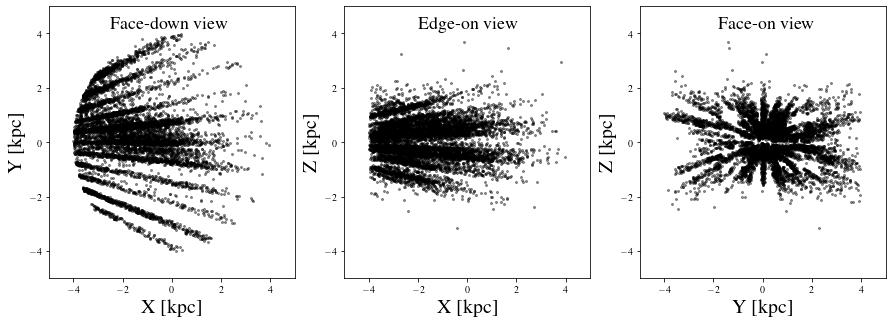

In [435]:
fig, ax = plt.subplots(1,3,figsize=(15, 5))

ax[0].scatter(x_all,y_all, s=4,c='k',alpha=0.4)
ax[0].text(-2.5,4.2,'Face-down view',fontsize=18)
ax[0].set_xlim(-5,5)
ax[0].set_ylim(-5,5)
ax[0].set_xlabel('X [kpc]',fontsize=20)
ax[0].set_ylabel('Y [kpc]',fontsize=20)

ax[1].scatter(x_all, z_all, s=4,c='k',alpha=0.4)
ax[1].text(-2.,4.2,'Edge-on view',fontsize=18)
ax[1].set_xlim(-5,5)
ax[1].set_ylim(-5,5)
ax[1].set_xlabel('X [kpc]',fontsize=20)
ax[1].set_ylabel('Z [kpc]',fontsize=20)

ax[2].scatter(y_all,z_all , s=4,c='k',alpha=0.4)
ax[2].text(-1.8,4.2,'Face-on view',fontsize=18)
ax[2].set_xlim(-5,5)
ax[2].set_ylim(-5,5)
ax[2].set_xlabel('Y [kpc]',fontsize=20)
ax[2].set_ylabel('Z [kpc]',fontsize=20)


Text(0, 0.5, 'L$_{z}$ [kpc km/s]')

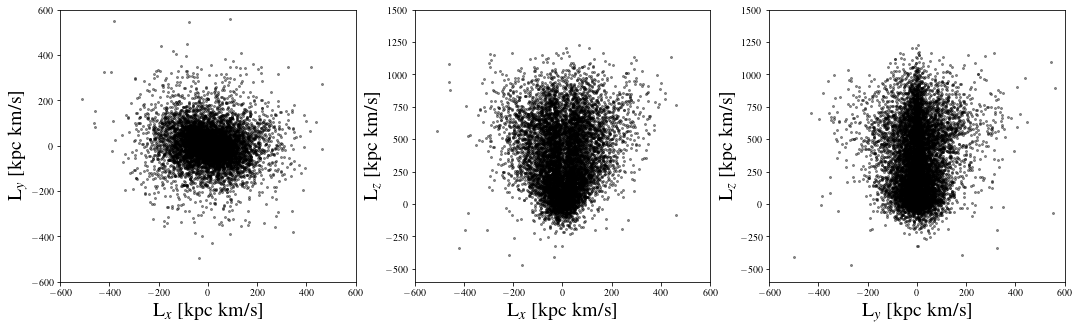

In [437]:
fig, ax = plt.subplots(1,3,figsize=(18, 5))

ax[0].scatter(lx_all,ly_all, s=4,c='k',alpha=0.4)
ax[0].set_xlim(-600,600)
ax[0].set_ylim(-600,600)
ax[0].set_xlabel('L$_{x}$ [kpc km/s]',fontsize=20)
ax[0].set_ylabel('L$_{y}$ [kpc km/s]',fontsize=20)

ax[1].scatter(lx_all, lz_all, s=4,c='k',alpha=0.4)
ax[1].set_xlim(-600,600)
ax[1].set_ylim(-600,1500)
ax[1].set_xlabel('L$_{x}$ [kpc km/s]',fontsize=20)
ax[1].set_ylabel('L$_{z}$ [kpc km/s]',fontsize=20)

ax[2].scatter(ly_all,lz_all , s=4,c='k',alpha=0.4)
ax[2].set_xlim(-600,600)
ax[2].set_ylim(-600,1500)
ax[2].set_xlabel('L$_{y}$ [kpc km/s]',fontsize=20)
ax[2].set_ylabel('L$_{z}$ [kpc km/s]',fontsize=20)


In [438]:
data_xy = np.array([x_all,y_all])
data_xz = np.array([x_all,z_all])
data_yz = np.array([y_all,z_all])


In [439]:
from scipy.stats import kde
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k_all_xy = kde.gaussian_kde(data_xy)
nbins=10
xi_all_xy, yi_all_xy = np.mgrid[-5:5:nbins*1j, -5:5:nbins*1j]
zi_all_xy = k_all_xy(np.vstack([xi_all_xy.flatten(), yi_all_xy.flatten()]))

k_all_xz = kde.gaussian_kde(data_xz)
nbins=10
xi_all_xz, yi_all_xz = np.mgrid[-5:5:nbins*1j, -5:5:nbins*1j]
zi_all_xz = k_all_xz(np.vstack([xi_all_xz.flatten(), yi_all_xz.flatten()]))

k_all_yz = kde.gaussian_kde(data_yz)
nbins=10
xi_all_yz, yi_all_yz = np.mgrid[-5:5:nbins*1j, -5:5:nbins*1j]
zi_all_yz = k_all_yz(np.vstack([xi_all_yz.flatten(), yi_all_yz.flatten()]))


Text(0, 0.5, 'Z [kpc]')

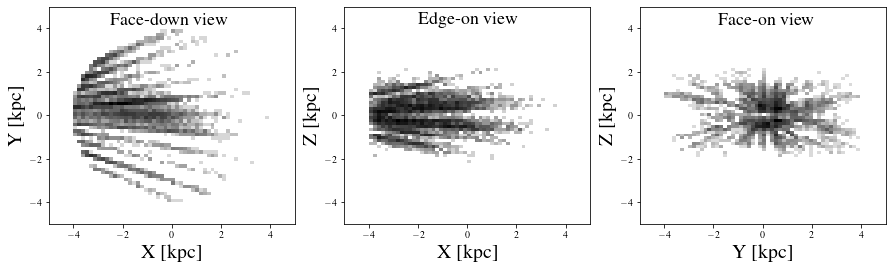

In [440]:
from matplotlib.colors import LogNorm
fig, ax = plt.subplots(1,3,figsize=(15, 4))

ax[0].hist2d(x_all,y_all,bins=50,cmap='binary',norm=LogNorm())
ax[0].text(-2.5,4.2,'Face-down view',fontsize=18)
ax[0].set_xlim(-5,5)
ax[0].set_ylim(-5,5)
ax[0].set_xlabel('X [kpc]',fontsize=20)
ax[0].set_ylabel('Y [kpc]',fontsize=20)

# color = ax[1].imshow(np.rot90(zi_all_xz.reshape(xi_all_xz.shape)),cmap='binary',extent=[-5,5,-5,5])
ax[1].hist2d(x_all,z_all,bins=50,cmap='binary',norm=LogNorm())
ax[1].text(-2.,4.2,'Edge-on view',fontsize=18)
ax[1].set_xlim(-5,5)
ax[1].set_ylim(-5,5)
ax[1].set_xlabel('X [kpc]',fontsize=20)
ax[1].set_ylabel('Z [kpc]',fontsize=20)

# cax = ax[1].inset_axes([0.15, 1.08, 0.7, 0.05])
# cbar = fig.colorbar(ax=ax[1],cax=cax,orientation='horizontal')
# cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
# cbar.ax.tick_params(labelsize=21)
# cbar.ax.xaxis.set_ticks_position('top')
# cbar.ax.xaxis.set_label_position('top')

plt.hist2d(y_all,z_all,bins=50,cmap='binary',norm=LogNorm())
# ax[2].imshow(np.rot90(zi_all_yz.reshape(xi_all_yz.shape)),cmap='binary',extent=[-5,5,-5,5])
ax[2].text(-1.8,4.2,'Face-on view',fontsize=18)
ax[2].set_xlim(-5,5)
ax[2].set_ylim(-5,5)
ax[2].set_xlabel('Y [kpc]',fontsize=20)
ax[2].set_ylabel('Z [kpc]',fontsize=20)
# plt.colorbar()


Text(0, 0.5, 'L$_{z}$ [kpc km/s]')

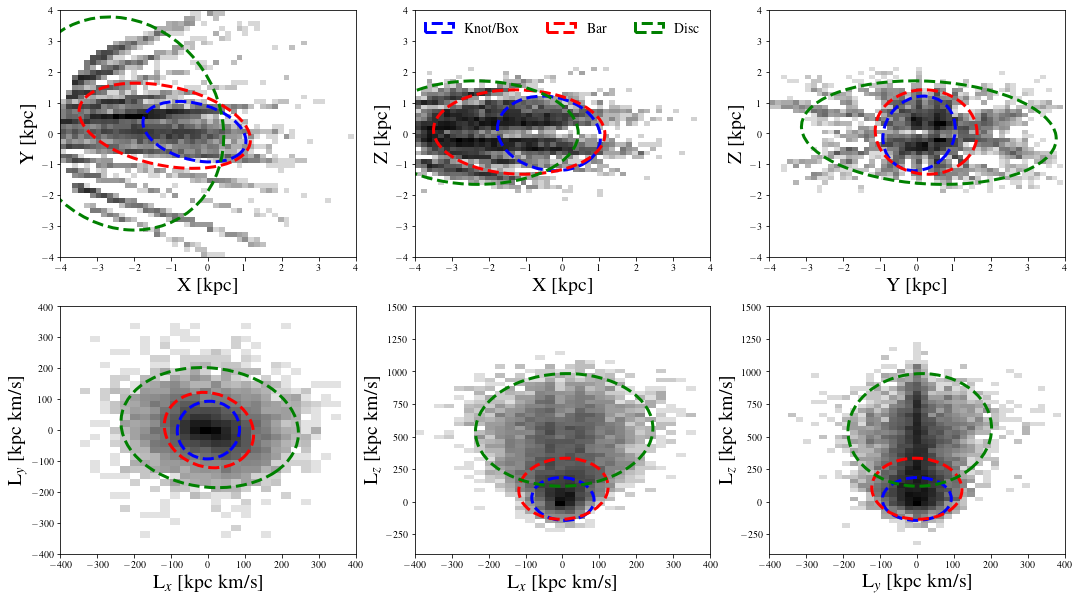

In [455]:
from matplotlib.colors import LogNorm
fig, ax = plt.subplots(2,3,figsize=(18, 10),facecolor='white')


ax[0,0].hist2d(x_all,y_all,bins=50,cmap='binary',norm=LogNorm())
confidence_ellipse(x_knot_all, y_knot_all,ax[0,0], n_std=2,
    label=r'$1\sigma$', edgecolor='b',lw=3,ls='dashed')

confidence_ellipse(x_bar_all, y_bar_all,ax[0,0], n_std=2,
    label=r'$1\sigma$', edgecolor='r',lw=3,ls='dashed')

confidence_ellipse(x_disc_all, y_disc_all,ax[0,0], n_std=2,
    label=r'$1\sigma$', edgecolor='g',lw=3,ls='dashed')
# ax[1,0].text(-2.5,4.2,'Face-down view',fontsize=18)
ax[0,0].set_xlim(-4,4)
ax[0,0].set_ylim(-4,4)
ax[0,0].set_xlabel('X [kpc]',fontsize=20)
ax[0,0].set_ylabel('Y [kpc]',fontsize=20)

# color = ax[1].imshow(np.rot90(zi_all_xz.reshape(xi_all_xz.shape)),cmap='binary',extent=[-5,5,-5,5])
ax[0,1].hist2d(x_all,z_all,bins=50,cmap='binary',norm=LogNorm())
confidence_ellipse(x_knot_all, z_knot_all,ax[0,1], n_std=2,
    label=r'Knot/Box', edgecolor='b',lw=3,ls='dashed')

confidence_ellipse(x_bar_all, z_bar_all,ax[0,1], n_std=2,
    label=r'Bar', edgecolor='r',lw=3,ls='dashed')

confidence_ellipse(x_disc_all, z_disc_all,ax[0,1], n_std=2,
    label=r'Disc', edgecolor='g',lw=3,ls='dashed')
# ax[1,1].text(-2.,4.2,'Edge-on view',fontsize=18)
ax[0,1].set_xlim(-4,4)
ax[0,1].set_ylim(-4,4)
ax[0,1].set_xlabel('X [kpc]',fontsize=20)
ax[0,1].set_ylabel('Z [kpc]',fontsize=20)
ax[0,1].legend(loc='upper center',fontsize=14,ncol=3,frameon=False)

# cax = ax[1].inset_axes([0.15, 1.08, 0.7, 0.05])
# cbar = fig.colorbar(ax=ax[1],cax=cax,orientation='horizontal')
# cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
# cbar.ax.tick_params(labelsize=21)
# cbar.ax.xaxis.set_ticks_position('top')
# cbar.ax.xaxis.set_label_position('top')

ax[0,2].hist2d(y_all,z_all,bins=50,cmap='binary',norm=LogNorm())
confidence_ellipse(y_knot_all, z_knot_all,ax[0,2], n_std=2,
    label=r'Knot/Box', edgecolor='b',lw=3,ls='dashed')

confidence_ellipse(y_bar_all, z_bar_all,ax[0,2], n_std=2,
    label=r'Bar', edgecolor='r',lw=3,ls='dashed')

confidence_ellipse(y_disc_all, z_disc_all,ax[0,2], n_std=2,
    label=r'Disc', edgecolor='g',lw=3,ls='dashed')
# ax[2].imshow(np.rot90(zi_all_yz.reshape(xi_all_yz.shape)),cmap='binary',extent=[-5,5,-5,5])
# ax[1,2].text(-1.8,4.2,'Face-on view',fontsize=18)
ax[0,2].set_xlim(-4,4)
ax[0,2].set_ylim(-4,4)
ax[0,2].set_xlabel('Y [kpc]',fontsize=20)
ax[0,2].set_ylabel('Z [kpc]',fontsize=20)

ax[1,0].hist2d(lx_all,ly_all,bins=50,cmap='binary',norm=LogNorm())
confidence_ellipse(lx_knot_all, ly_knot_all,ax[1,0], n_std=2,
    label=r'$1\sigma$', edgecolor='b',lw=3,ls='dashed')

confidence_ellipse(lx_bar_all, ly_bar_all,ax[1,0], n_std=2,
    label=r'$1\sigma$', edgecolor='r',lw=3,ls='dashed')

confidence_ellipse(lx_disc_all, ly_disc_all,ax[1,0], n_std=2,
    label=r'$1\sigma$', edgecolor='g',lw=3,ls='dashed')
ax[1,0].set_xlim(-400,400)
ax[1,0].set_ylim(-400,400)
ax[1,0].set_xlabel('L$_{x}$ [kpc km/s]',fontsize=20)
ax[1,0].set_ylabel('L$_{y}$ [kpc km/s]',fontsize=20)

# color = ax[1].imshow(np.rot90(zi_all_xz.reshape(xi_all_xz.shape)),cmap='binary',extent=[-5,5,-5,5])
ax[1,1].hist2d(lx_all,lz_all,bins=50,cmap='binary',norm=LogNorm())
confidence_ellipse(lx_knot_all, lz_knot_all,ax[1,1], n_std=2,
    label=r'$1\sigma$', edgecolor='b',lw=3,ls='dashed')

confidence_ellipse(lx_bar_all, lz_bar_all,ax[1,1], n_std=2,
    label=r'$1\sigma$', edgecolor='r',lw=3,ls='dashed')

confidence_ellipse(lx_disc_all, lz_disc_all,ax[1,1], n_std=2,
    label=r'$1\sigma$', edgecolor='g',lw=3,ls='dashed')
ax[1,1].set_xlim(-400,400)
ax[1,1].set_ylim(-400,1500)
ax[1,1].set_xlabel('L$_{x}$ [kpc km/s]',fontsize=20)
ax[1,1].set_ylabel('L$_{z}$ [kpc km/s]',fontsize=20)


# cax = ax[1].inset_axes([0.15, 1.08, 0.7, 0.05])
# cbar = fig.colorbar(ax=ax[1],cax=cax,orientation='horizontal')
# cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
# cbar.ax.tick_params(labelsize=21)
# cbar.ax.xaxis.set_ticks_position('top')
# cbar.ax.xaxis.set_label_position('top')

ax[1,2].hist2d(ly_all,lz_all,bins=50,cmap='binary',norm=LogNorm())
confidence_ellipse(ly_knot_all, lz_knot_all,ax[1,2], n_std=2,
    label=r'$1\sigma$', edgecolor='b',lw=3,ls='dashed')

confidence_ellipse(ly_bar_all, lz_bar_all,ax[1,2], n_std=2,
    label=r'$1\sigma$', edgecolor='r',lw=3,ls='dashed')

confidence_ellipse(ly_disc_all, lz_disc_all,ax[1,2], n_std=2,
    label=r'$1\sigma$', edgecolor='g',lw=3,ls='dashed')
ax[1,2].set_xlim(-400,400)
ax[1,2].set_ylim(-400,1500)
ax[1,2].set_xlabel('L$_{y}$ [kpc km/s]',fontsize=20)
ax[1,2].set_ylabel('L$_{z}$ [kpc km/s]',fontsize=20)


# plot the confidence ellipse for each bin separatelt

Text(0, 0.5, 'Z [kpc]')

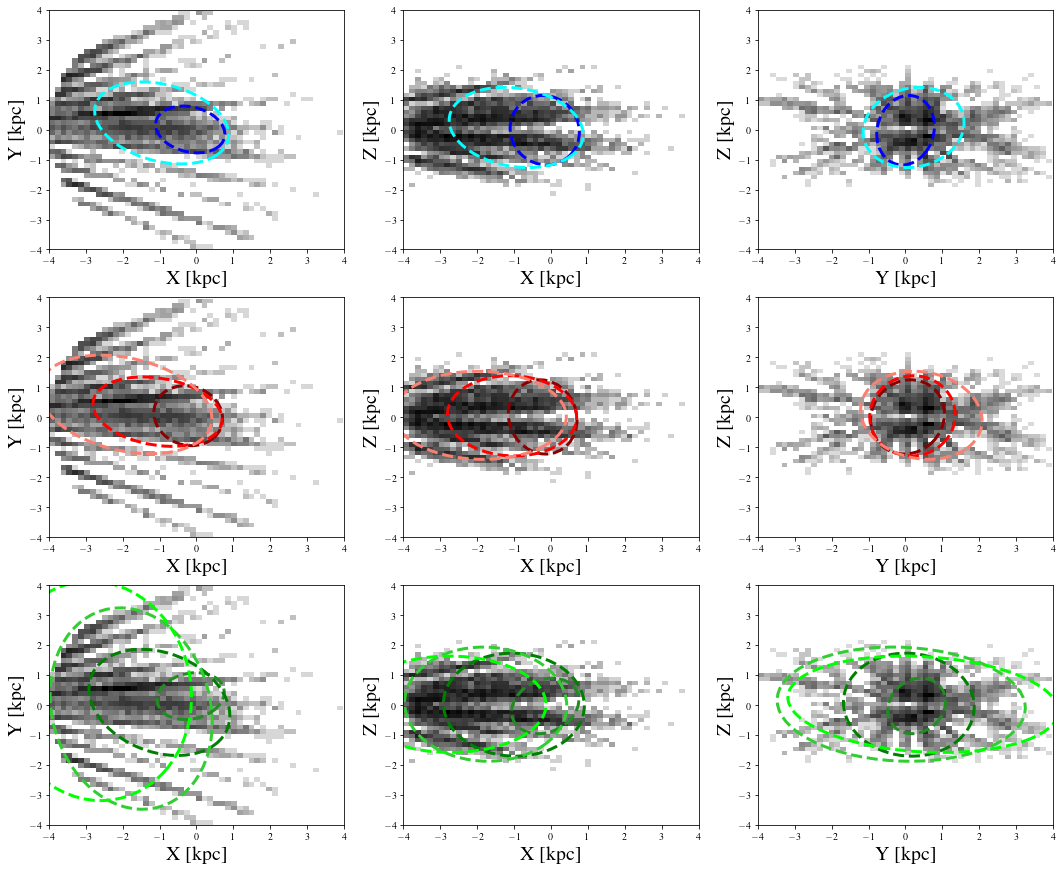

In [454]:
from matplotlib.colors import LogNorm
fig, ax = plt.subplots(3,3,figsize=(18, 15),facecolor='white')


ax[0,0].hist2d(x_all,y_all,bins=50,cmap='binary',norm=LogNorm())
confidence_ellipse(data1['X_1'][mask_knot1], data1['Y_1'][mask_knot1],ax[0,0], n_std=2,
    label=r'$1\sigma$', edgecolor='b',lw=3,ls='dashed')
confidence_ellipse(data2['X_1'][mask_knot2], data2['Y_1'][mask_knot2],ax[0,0], n_std=2,
    label=r'$1\sigma$', edgecolor='cyan',lw=3,ls='dashed')
# ax[1,0].text(-2.5,4.2,'Face-down view',fontsize=18)
ax[0,0].set_xlim(-4,4)
ax[0,0].set_ylim(-4,4)
ax[0,0].set_xlabel('X [kpc]',fontsize=20)
ax[0,0].set_ylabel('Y [kpc]',fontsize=20)

# color = ax[1].imshow(np.rot90(zi_all_xz.reshape(xi_all_xz.shape)),cmap='binary',extent=[-5,5,-5,5])
ax[0,1].hist2d(x_all,z_all,bins=50,cmap='binary',norm=LogNorm())
confidence_ellipse(data1['X_1'][mask_knot1], data1['Z_1'][mask_knot1],ax[0,1], n_std=2,
    label=r'$1\sigma$', edgecolor='b',lw=3,ls='dashed')
confidence_ellipse(data2['X_1'][mask_knot2], data2['Z_1'][mask_knot2],ax[0,1], n_std=2,
    label=r'$1\sigma$', edgecolor='cyan',lw=3,ls='dashed')
# ax[1,1].text(-2.,4.2,'Edge-on view',fontsize=18)
ax[0,1].set_xlim(-4,4)
ax[0,1].set_ylim(-4,4)
ax[0,1].set_xlabel('X [kpc]',fontsize=20)
ax[0,1].set_ylabel('Z [kpc]',fontsize=20)
# ax[0,1].legend(loc='upper center',fontsize=14,ncol=3,frameon=False)

# cax = ax[1].inset_axes([0.15, 1.08, 0.7, 0.05])
# cbar = fig.colorbar(ax=ax[1],cax=cax,orientation='horizontal')
# cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
# cbar.ax.tick_params(labelsize=21)
# cbar.ax.xaxis.set_ticks_position('top')
# cbar.ax.xaxis.set_label_position('top')

ax[0,2].hist2d(y_all,z_all,bins=50,cmap='binary',norm=LogNorm())
confidence_ellipse(data1['Y_1'][mask_knot1], data1['Z_1'][mask_knot1],ax[0,2], n_std=2,
    label=r'$1\sigma$', edgecolor='b',lw=3,ls='dashed')
confidence_ellipse(data2['Y_1'][mask_knot2], data2['Z_1'][mask_knot2],ax[0,2], n_std=2,
    label=r'$1\sigma$', edgecolor='cyan',lw=3,ls='dashed')
# ax[2].imshow(np.rot90(zi_all_yz.reshape(xi_all_yz.shape)),cmap='binary',extent=[-5,5,-5,5])
# ax[1,2].text(-1.8,4.2,'Face-on view',fontsize=18)
ax[0,2].set_xlim(-4,4)
ax[0,2].set_ylim(-4,4)
ax[0,2].set_xlabel('Y [kpc]',fontsize=20)
ax[0,2].set_ylabel('Z [kpc]',fontsize=20)



ax[1,0].hist2d(x_all,y_all,bins=50,cmap='binary',norm=LogNorm())
confidence_ellipse(data1['X_1'][mask_bar1], data1['Y_1'][mask_bar1],ax[1,0], n_std=2,
    label=r'$1\sigma$', edgecolor='darkred',lw=3,ls='dashed')
confidence_ellipse(data2['X_1'][mask_bar2], data2['Y_1'][mask_bar2],ax[1,0], n_std=2,
    label=r'$1\sigma$', edgecolor='r',lw=3,ls='dashed')
confidence_ellipse(data3['X_1'][mask_bar3], data3['Y_1'][mask_bar3],ax[1,0], n_std=2,
    label=r'$1\sigma$', edgecolor='salmon',lw=3,ls='dashed')

# ax[1,0].text(-2.5,4.2,'Face-down view',fontsize=18)
ax[1,0].set_xlim(-4,4)
ax[1,0].set_ylim(-4,4)
ax[1,0].set_xlabel('X [kpc]',fontsize=20)
ax[1,0].set_ylabel('Y [kpc]',fontsize=20)

# color = ax[1].imshow(np.rot90(zi_all_xz.reshape(xi_all_xz.shape)),cmap='binary',extent=[-5,5,-5,5])
ax[1,1].hist2d(x_all,z_all,bins=50,cmap='binary',norm=LogNorm())
confidence_ellipse(data1['X_1'][mask_bar1], data1['Z_1'][mask_bar1],ax[1,1], n_std=2,
    label=r'$1\sigma$', edgecolor='darkred',lw=3,ls='dashed')
confidence_ellipse(data2['X_1'][mask_bar2], data2['Z_1'][mask_bar2],ax[1,1], n_std=2,
    label=r'$1\sigma$', edgecolor='r',lw=3,ls='dashed')
confidence_ellipse(data3['X_1'][mask_bar3], data3['Z_1'][mask_bar3],ax[1,1], n_std=2,
    label=r'$1\sigma$', edgecolor='salmon',lw=3,ls='dashed')
# ax[1,1].text(-2.,4.2,'Edge-on view',fontsize=18)
ax[1,1].set_xlim(-4,4)
ax[1,1].set_ylim(-4,4)
ax[1,1].set_xlabel('X [kpc]',fontsize=20)
ax[1,1].set_ylabel('Z [kpc]',fontsize=20)
# ax[1,1].legend(loc='upper center',fontsize=14,ncol=3,frameon=False)

# cax = ax[1].inset_axes([0.15, 1.08, 0.7, 0.05])
# cbar = fig.colorbar(ax=ax[1],cax=cax,orientation='horizontal')
# cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
# cbar.ax.tick_params(labelsize=21)
# cbar.ax.xaxis.set_ticks_position('top')
# cbar.ax.xaxis.set_label_position('top')

ax[1,2].hist2d(y_all,z_all,bins=50,cmap='binary',norm=LogNorm())
confidence_ellipse(data1['Y_1'][mask_bar1], data1['Z_1'][mask_bar1],ax[1,2], n_std=2,
    label=r'$1\sigma$', edgecolor='darkred',lw=3,ls='dashed')
confidence_ellipse(data2['Y_1'][mask_bar2], data2['Z_1'][mask_bar2],ax[1,2], n_std=2,
    label=r'$1\sigma$', edgecolor='r',lw=3,ls='dashed')
confidence_ellipse(data3['Y_1'][mask_bar3], data3['Z_1'][mask_bar3],ax[1,2], n_std=2,
    label=r'$1\sigma$', edgecolor='salmon',lw=3,ls='dashed')
# ax[2].imshow(np.rot90(zi_all_yz.reshape(xi_all_yz.shape)),cmap='binary',extent=[-5,5,-5,5])
# ax[1,2].text(-1.8,4.2,'Face-on view',fontsize=18)
ax[1,2].set_xlim(-4,4)
ax[1,2].set_ylim(-4,4)
ax[1,2].set_xlabel('Y [kpc]',fontsize=20)
ax[1,2].set_ylabel('Z [kpc]',fontsize=20)


ax[2,0].hist2d(x_all,y_all,bins=50,cmap='binary',norm=LogNorm())
confidence_ellipse(data1['X_1'][mask_disc1], data1['Y_1'][mask_disc1],ax[2,0], n_std=2,
    label=r'$1\sigma$', edgecolor='forestgreen',lw=3,ls='dashed')
confidence_ellipse(data2['X_1'][mask_disc2], data2['Y_1'][mask_disc2],ax[2,0], n_std=2,
    label=r'$1\sigma$', edgecolor='g',lw=3,ls='dashed')
confidence_ellipse(data3['X_1'][mask_disc3], data3['Y_1'][mask_disc3],ax[2,0], n_std=2,
    label=r'$1\sigma$', edgecolor='limegreen',lw=3,ls='dashed')
confidence_ellipse(data4['X_1'][mask_disc4], data4['Y_1'][mask_disc4],ax[2,0], n_std=2,
    label=r'$1\sigma$', edgecolor='lime',lw=3,ls='dashed')
# ax[1,0].text(-2.5,4.2,'Face-down view',fontsize=18)
ax[2,0].set_xlim(-4,4)
ax[2,0].set_ylim(-4,4)
ax[2,0].set_xlabel('X [kpc]',fontsize=20)
ax[2,0].set_ylabel('Y [kpc]',fontsize=20)

# color = ax[1].imshow(np.rot90(zi_all_xz.reshape(xi_all_xz.shape)),cmap='binary',extent=[-5,5,-5,5])
ax[2,1].hist2d(x_all,z_all,bins=50,cmap='binary',norm=LogNorm())
confidence_ellipse(data1['X_1'][mask_disc1], data1['Z_1'][mask_disc1],ax[2,1], n_std=2,
    label=r'$1\sigma$', edgecolor='forestgreen',lw=3,ls='dashed')
confidence_ellipse(data2['X_1'][mask_disc2], data2['Z_1'][mask_disc2],ax[2,1], n_std=2,
    label=r'$1\sigma$', edgecolor='g',lw=3,ls='dashed')
confidence_ellipse(data3['X_1'][mask_disc3], data3['Z_1'][mask_disc3],ax[2,1], n_std=2,
    label=r'$1\sigma$', edgecolor='limegreen',lw=3,ls='dashed')
confidence_ellipse(data4['X_1'][mask_disc4], data4['Z_1'][mask_disc4],ax[2,1], n_std=2,
    label=r'$1\sigma$', edgecolor='lime',lw=3,ls='dashed')
# ax[1,1].text(-2.,4.2,'Edge-on view',fontsize=18)
ax[2,1].set_xlim(-4,4)
ax[2,1].set_ylim(-4,4)
ax[2,1].set_xlabel('X [kpc]',fontsize=20)
ax[2,1].set_ylabel('Z [kpc]',fontsize=20)
# ax[2,1].legend(loc='upper center',fontsize=14,ncol=3,frameon=False)

# cax = ax[1].inset_axes([0.15, 1.08, 0.7, 0.05])
# cbar = fig.colorbar(ax=ax[1],cax=cax,orientation='horizontal')
# cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
# cbar.ax.tick_params(labelsize=21)
# cbar.ax.xaxis.set_ticks_position('top')
# cbar.ax.xaxis.set_label_position('top')

ax[2,2].hist2d(y_all,z_all,bins=50,cmap='binary',norm=LogNorm())
confidence_ellipse(data1['Y_1'][mask_disc1], data1['Z_1'][mask_disc1],ax[2,2], n_std=2,
    label=r'$1\sigma$', edgecolor='forestgreen',lw=3,ls='dashed')
confidence_ellipse(data2['Y_1'][mask_disc2], data2['Z_1'][mask_disc2],ax[2,2], n_std=2,
    label=r'$1\sigma$', edgecolor='green',lw=3,ls='dashed')
confidence_ellipse(data3['Y_1'][mask_disc3], data3['Z_1'][mask_disc3],ax[2,2], n_std=2,
    label=r'$1\sigma$', edgecolor='limegreen',lw=3,ls='dashed')
confidence_ellipse(data4['Y_1'][mask_disc4], data4['Z_1'][mask_disc4],ax[2,2], n_std=2,
    label=r'$1\sigma$', edgecolor='lime',lw=3,ls='dashed')
# ax[2].imshow(np.rot90(zi_all_yz.reshape(xi_all_yz.shape)),cmap='binary',extent=[-5,5,-5,5])
# ax[1,2].text(-1.8,4.2,'Face-on view',fontsize=18)
ax[2,2].set_xlim(-4,4)
ax[2,2].set_ylim(-4,4)
ax[2,2].set_xlabel('Y [kpc]',fontsize=20)
ax[2,2].set_ylabel('Z [kpc]',fontsize=20)


Text(0, 0.5, 'L$_{z}$ [kpc km/s]')

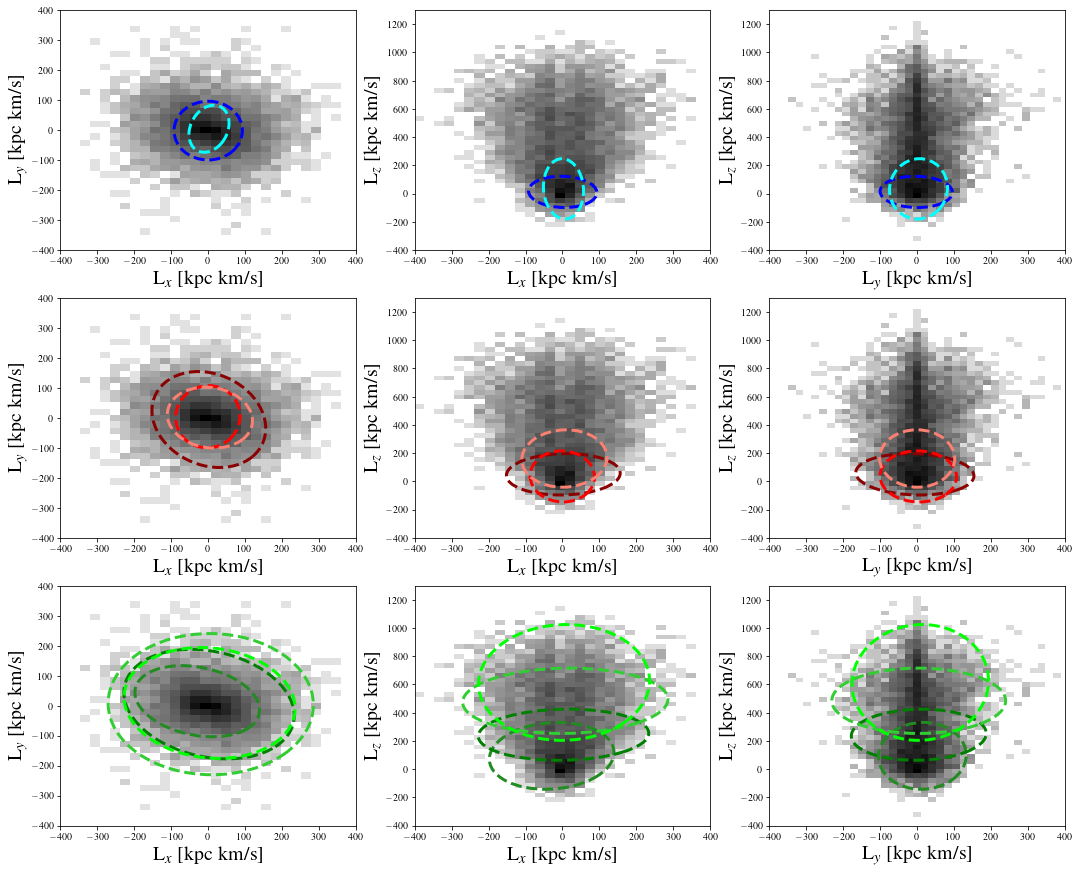

In [453]:
from matplotlib.colors import LogNorm
fig, ax = plt.subplots(3,3,figsize=(18, 15),facecolor='white')


ax[0,0].hist2d(lx_all,ly_all,bins=50,cmap='binary',norm=LogNorm())
confidence_ellipse(lx1[mask_knot1], ly1[mask_knot1],ax[0,0], n_std=2,
    label=r'$1\sigma$', edgecolor='b',lw=3,ls='dashed')
confidence_ellipse(lx2[mask_knot2], ly2[mask_knot2],ax[0,0], n_std=2,
    label=r'$1\sigma$', edgecolor='cyan',lw=3,ls='dashed')
# ax[1,0].text(-2.5,4.2,'Face-down view',fontsize=18)
ax[0,0].set_xlim(-400,400)
ax[0,0].set_ylim(-400,400)
ax[0,0].set_xlabel('L$_{x}$ [kpc km/s]',fontsize=20)
ax[0,0].set_ylabel('L$_{y}$ [kpc km/s]',fontsize=20)

# color = ax[1].imshow(np.rot90(zi_all_xz.reshape(xi_all_xz.shape)),cmap='binary',extent=[-5,5,-5,5])
ax[0,1].hist2d(lx_all,lz_all,bins=50,cmap='binary',norm=LogNorm())
confidence_ellipse(lx1[mask_knot1], lz1[mask_knot1],ax[0,1], n_std=2,
    label=r'$1\sigma$', edgecolor='b',lw=3,ls='dashed')
confidence_ellipse(lx2[mask_knot2], lz2[mask_knot2],ax[0,1], n_std=2,
    label=r'$1\sigma$', edgecolor='cyan',lw=3,ls='dashed')
# ax[1,1].text(-2.,4.2,'Edge-on view',fontsize=18)
ax[0,1].set_xlim(-400,400)
ax[0,1].set_ylim(-400,1300)
ax[0,1].set_xlabel('L$_{x}$ [kpc km/s]',fontsize=20)
ax[0,1].set_ylabel('L$_{z}$ [kpc km/s]',fontsize=20)
# ax[0,1].legend(loc='upper center',fontsize=14,ncol=3,frameon=False)

# cax = ax[1].inset_axes([0.15, 1.08, 0.7, 0.05])
# cbar = fig.colorbar(ax=ax[1],cax=cax,orientation='horizontal')
# cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
# cbar.ax.tick_params(labelsize=21)
# cbar.ax.xaxis.set_ticks_position('top')
# cbar.ax.xaxis.set_label_position('top')

ax[0,2].hist2d(ly_all,lz_all,bins=50,cmap='binary',norm=LogNorm())
confidence_ellipse(ly1[mask_knot1], lz1[mask_knot1],ax[0,2], n_std=2,
    label=r'$1\sigma$', edgecolor='b',lw=3,ls='dashed')
confidence_ellipse(ly2[mask_knot2], lz2[mask_knot2],ax[0,2], n_std=2,
    label=r'$1\sigma$', edgecolor='cyan',lw=3,ls='dashed')
# ax[2].imshow(np.rot90(zi_all_yz.reshape(xi_all_yz.shape)),cmap='binary',extent=[-5,5,-5,5])
# ax[1,2].text(-1.8,4.2,'Face-on view',fontsize=18)
ax[0,2].set_xlim(-400,400)
ax[0,2].set_ylim(-400,1300)
ax[0,2].set_xlabel('L$_{y}$ [kpc km/s]',fontsize=20)
ax[0,2].set_ylabel('L$_{z}$ [kpc km/s]',fontsize=20)



ax[1,0].hist2d(lx_all,ly_all,bins=50,cmap='binary',norm=LogNorm())
confidence_ellipse(lx1[mask_bar1], ly1[mask_bar1],ax[1,0], n_std=2,
    label=r'$1\sigma$', edgecolor='darkred',lw=3,ls='dashed')
confidence_ellipse(lx2[mask_bar2], ly2[mask_bar2],ax[1,0], n_std=2,
    label=r'$1\sigma$', edgecolor='r',lw=3,ls='dashed')
confidence_ellipse(lx3[mask_bar3], ly3[mask_bar3],ax[1,0], n_std=2,
    label=r'$1\sigma$', edgecolor='salmon',lw=3,ls='dashed')

# ax[1,0].text(-2.5,4.2,'Face-down view',fontsize=18)
ax[1,0].set_xlim(-400,400)
ax[1,0].set_ylim(-400,400)
ax[1,0].set_xlabel('L$_{x}$ [kpc km/s]',fontsize=20)
ax[1,0].set_ylabel('L$_{y}$ [kpc km/s]',fontsize=20)

# color = ax[1].imshow(np.rot90(zi_all_xz.reshape(xi_all_xz.shape)),cmap='binary',extent=[-5,5,-5,5])
ax[1,1].hist2d(lx_all,lz_all,bins=50,cmap='binary',norm=LogNorm())
confidence_ellipse(lx1[mask_bar1], lz1[mask_bar1],ax[1,1], n_std=2,
    label=r'$1\sigma$', edgecolor='darkred',lw=3,ls='dashed')
confidence_ellipse(lx2[mask_bar2], lz2[mask_bar2],ax[1,1], n_std=2,
    label=r'$1\sigma$', edgecolor='r',lw=3,ls='dashed')
confidence_ellipse(lx3[mask_bar3], lz3[mask_bar3],ax[1,1], n_std=2,
    label=r'$1\sigma$', edgecolor='salmon',lw=3,ls='dashed')
# ax[1,1].text(-2.,4.2,'Edge-on view',fontsize=18)
ax[1,1].set_xlim(-400,400)
ax[1,1].set_ylim(-400,1300)
ax[1,1].set_xlabel('L$_{x}$ [kpc km/s]',fontsize=20)
ax[1,1].set_ylabel('L$_{z}$ [kpc km/s]',fontsize=20)
# ax[1,1].legend(loc='upper center',fontsize=14,ncol=3,frameon=False)

# cax = ax[1].inset_axes([0.15, 1.08, 0.7, 0.05])
# cbar = fig.colorbar(ax=ax[1],cax=cax,orientation='horizontal')
# cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
# cbar.ax.tick_params(labelsize=21)
# cbar.ax.xaxis.set_ticks_position('top')
# cbar.ax.xaxis.set_label_position('top')

ax[1,2].hist2d(ly_all,lz_all,bins=50,cmap='binary',norm=LogNorm())
confidence_ellipse(ly1[mask_bar1], lz1[mask_bar1],ax[1,2], n_std=2,
    label=r'$1\sigma$', edgecolor='darkred',lw=3,ls='dashed')
confidence_ellipse(ly2[mask_bar2], lz2[mask_bar2],ax[1,2], n_std=2,
    label=r'$1\sigma$', edgecolor='r',lw=3,ls='dashed')
confidence_ellipse(ly3[mask_bar3], lz3[mask_bar3],ax[1,2], n_std=2,
    label=r'$1\sigma$', edgecolor='salmon',lw=3,ls='dashed')
# ax[2].imshow(np.rot90(zi_all_yz.reshape(xi_all_yz.shape)),cmap='binary',extent=[-5,5,-5,5])
# ax[1,2].text(-1.8,4.2,'Face-on view',fontsize=18)
ax[1,2].set_xlim(-400,400)
ax[1,2].set_ylim(-400,1300)
ax[1,2].set_xlabel('L$_{y}$ [kpc km/s]',fontsize=20)
ax[1,2].set_ylabel('L$_{z}$ [kpc km/s]',fontsize=20)


ax[2,0].hist2d(lx_all,ly_all,bins=50,cmap='binary',norm=LogNorm())
confidence_ellipse(lx1[mask_disc1], ly1[mask_disc1],ax[2,0], n_std=2,
    label=r'$1\sigma$', edgecolor='forestgreen',lw=3,ls='dashed')
confidence_ellipse(lx2[mask_disc2], ly2[mask_disc2],ax[2,0], n_std=2,
    label=r'$1\sigma$', edgecolor='g',lw=3,ls='dashed')
confidence_ellipse(lx3[mask_disc3], ly3[mask_disc3],ax[2,0], n_std=2,
    label=r'$1\sigma$', edgecolor='limegreen',lw=3,ls='dashed')
confidence_ellipse(lx4[mask_disc4], ly4[mask_disc4],ax[2,0], n_std=2,
    label=r'$1\sigma$', edgecolor='lime',lw=3,ls='dashed')
# ax[1,0].text(-2.5,4.2,'Face-down view',fontsize=18)
ax[2,0].set_xlim(-400,400)
ax[2,0].set_ylim(-400,400)
ax[2,0].set_xlabel('L$_{x}$ [kpc km/s]',fontsize=20)
ax[2,0].set_ylabel('L$_{y}$ [kpc km/s]',fontsize=20)

# color = ax[1].imshow(np.rot90(zi_all_xz.reshape(xi_all_xz.shape)),cmap='binary',extent=[-5,5,-5,5])
ax[2,1].hist2d(lx_all,lz_all,bins=50,cmap='binary',norm=LogNorm())
confidence_ellipse(lx1[mask_disc1], lz1[mask_disc1],ax[2,1], n_std=2,
    label=r'$1\sigma$', edgecolor='forestgreen',lw=3,ls='dashed')
confidence_ellipse(lx2[mask_disc2], lz2[mask_disc2],ax[2,1], n_std=2,
    label=r'$1\sigma$', edgecolor='g',lw=3,ls='dashed')
confidence_ellipse(lx3[mask_disc3], lz3[mask_disc3],ax[2,1], n_std=2,
    label=r'$1\sigma$', edgecolor='limegreen',lw=3,ls='dashed')
confidence_ellipse(lx4[mask_disc4], lz4[mask_disc4],ax[2,1], n_std=2,
    label=r'$1\sigma$', edgecolor='lime',lw=3,ls='dashed')
# ax[1,1].text(-2.,4.2,'Edge-on view',fontsize=18)
ax[2,1].set_xlim(-400,400)
ax[2,1].set_ylim(-400,1300)
ax[2,1].set_xlabel('L$_{x}$ [kpc km/s]',fontsize=20)
ax[2,1].set_ylabel('L$_{z}$ [kpc km/s]',fontsize=20)
# ax[2,1].legend(loc='upper center',fontsize=14,ncol=3,frameon=False)

# cax = ax[1].inset_axes([0.15, 1.08, 0.7, 0.05])
# cbar = fig.colorbar(ax=ax[1],cax=cax,orientation='horizontal')
# cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
# cbar.ax.tick_params(labelsize=21)
# cbar.ax.xaxis.set_ticks_position('top')
# cbar.ax.xaxis.set_label_position('top')

ax[2,2].hist2d(ly_all,lz_all,bins=50,cmap='binary',norm=LogNorm())
confidence_ellipse(ly1[mask_disc1], lz1[mask_disc1],ax[2,2], n_std=2,
    label=r'$1\sigma$', edgecolor='forestgreen',lw=3,ls='dashed')
confidence_ellipse(ly2[mask_disc2], lz2[mask_disc2],ax[2,2], n_std=2,
    label=r'$1\sigma$', edgecolor='green',lw=3,ls='dashed')
confidence_ellipse(ly3[mask_disc3], lz3[mask_disc3],ax[2,2], n_std=2,
    label=r'$1\sigma$', edgecolor='limegreen',lw=3,ls='dashed')
confidence_ellipse(ly4[mask_disc4], lz4[mask_disc4],ax[2,2], n_std=2,
    label=r'$1\sigma$', edgecolor='lime',lw=3,ls='dashed')
# ax[2].imshow(np.rot90(zi_all_yz.reshape(xi_all_yz.shape)),cmap='binary',extent=[-5,5,-5,5])
# ax[1,2].text(-1.8,4.2,'Face-on view',fontsize=18)
ax[2,2].set_xlim(-400,400)
ax[2,2].set_ylim(-400,1300)
ax[2,2].set_xlabel('L$_{y}$ [kpc km/s]',fontsize=20)
ax[2,2].set_ylabel('L$_{z}$ [kpc km/s]',fontsize=20)


(array([  2.,   4.,  10.,  69., 199., 340., 304.,  43.,   6.,   4.]),
 array([-345.31840238, -253.66662426, -162.01484614,  -70.36306801,
          21.28871011,  112.94048823,  204.59226635,  296.24404447,
         387.8958226 ,  479.54760072,  571.19937884]),
 <BarContainer object of 10 artists>)

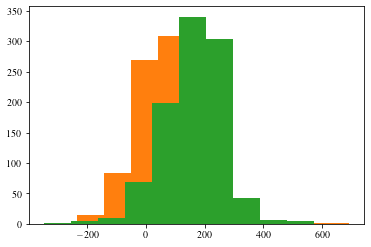

In [450]:
plt.hist(lz1[mask_bar1])
plt.hist(lz2[mask_bar2])
plt.hist(lz3[mask_bar3])

In [ ]:

ax[1,0].hist2d(lx_all,ly_all,bins=50,cmap='binary',norm=LogNorm())
confidence_ellipse(lx_knot_all, ly_knot_all,ax[1,0], n_std=2,
    label=r'$1\sigma$', edgecolor='b',lw=3,ls='dashed')

confidence_ellipse(lx_bar_all, ly_bar_all,ax[1,0], n_std=2,
    label=r'$1\sigma$', edgecolor='r',lw=3,ls='dashed')

confidence_ellipse(lx_disc_all, ly_disc_all,ax[1,0], n_std=2,
    label=r'$1\sigma$', edgecolor='g',lw=3,ls='dashed')
ax[1,0].set_xlim(-400,400)
ax[1,0].set_ylim(-400,400)
ax[1,0].set_xlabel('L$_{x}$ [kpc km/s]',fontsize=20)
ax[1,0].set_ylabel('L$_{y}$ [kpc km/s]',fontsize=20)

# color = ax[1].imshow(np.rot90(zi_all_xz.reshape(xi_all_xz.shape)),cmap='binary',extent=[-5,5,-5,5])
ax[1,1].hist2d(lx_all,lz_all,bins=50,cmap='binary',norm=LogNorm())
confidence_ellipse(lx_knot_all, lz_knot_all,ax[1,1], n_std=2,
    label=r'$1\sigma$', edgecolor='b',lw=3,ls='dashed')

confidence_ellipse(lx_bar_all, lz_bar_all,ax[1,1], n_std=2,
    label=r'$1\sigma$', edgecolor='r',lw=3,ls='dashed')

confidence_ellipse(lx_disc_all, lz_disc_all,ax[1,1], n_std=2,
    label=r'$1\sigma$', edgecolor='g',lw=3,ls='dashed')
ax[1,1].set_xlim(-400,400)
ax[1,1].set_ylim(-400,400)
ax[1,1].set_xlabel('L$_{x}$ [kpc km/s]',fontsize=20)
ax[1,1].set_ylabel('L$_{z}$ [kpc km/s]',fontsize=20)


# cax = ax[1].inset_axes([0.15, 1.08, 0.7, 0.05])
# cbar = fig.colorbar(ax=ax[1],cax=cax,orientation='horizontal')
# cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
# cbar.ax.tick_params(labelsize=21)
# cbar.ax.xaxis.set_ticks_position('top')
# cbar.ax.xaxis.set_label_position('top')

ax[1,2].hist2d(ly_all,lz_all,bins=50,cmap='binary',norm=LogNorm())
confidence_ellipse(ly_knot_all, lz_knot_all,ax[1,2], n_std=2,
    label=r'$1\sigma$', edgecolor='b',lw=3,ls='dashed')

confidence_ellipse(ly_bar_all, lz_bar_all,ax[1,2], n_std=2,
    label=r'$1\sigma$', edgecolor='r',lw=3,ls='dashed')

confidence_ellipse(ly_disc_all, lz_disc_all,ax[1,2], n_std=2,
    label=r'$1\sigma$', edgecolor='g',lw=3,ls='dashed')
ax[1,2].set_xlim(-400,400)
ax[1,2].set_ylim(-400,400)
ax[1,2].set_xlabel('L$_{y}$ [kpc km/s]',fontsize=20)
ax[1,2].set_ylabel('L$_{z}$ [kpc km/s]',fontsize=20)


Text(0, 0.5, 'Z [kpc]')

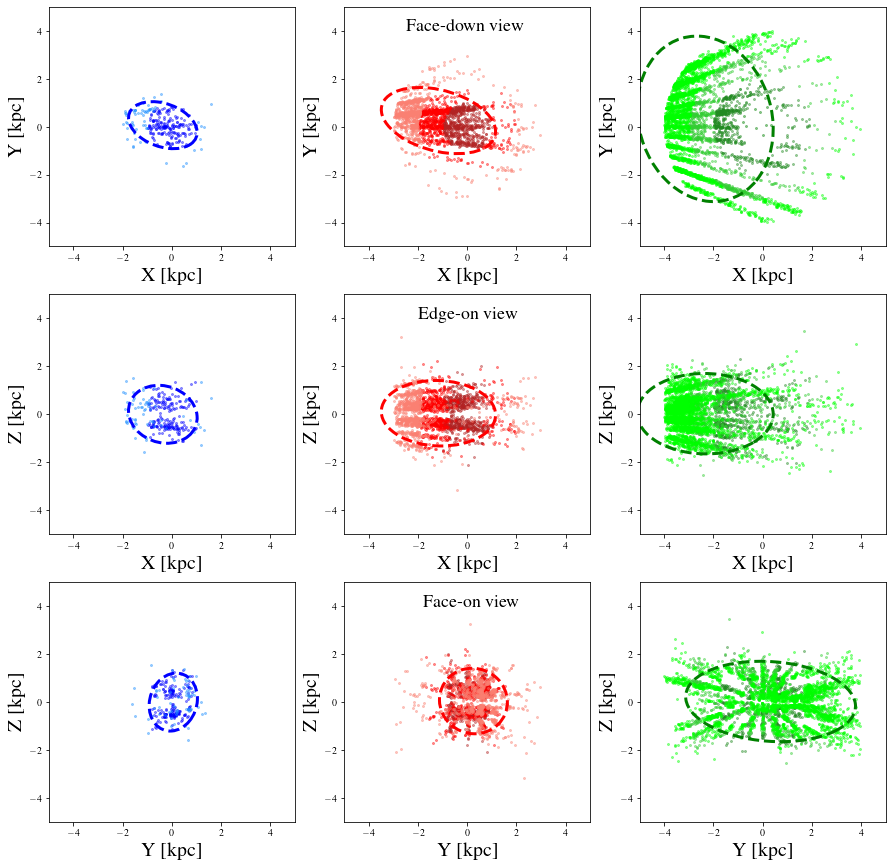

In [107]:
fig, ax = plt.subplots(3,3,figsize=(15, 15))

ax[0,0].scatter(data1['X_1'][mask_knot1], data1['Y_1'][mask_knot1], s=4,c='b',alpha=0.4)
ax[0,0].scatter(data2['X_1'][mask_knot2], data2['Y_1'][mask_knot2], s=4,c='dodgerblue',alpha=0.4)
confidence_ellipse(x_knot_all, y_knot_all,ax[0,0], n_std=2,
    label=r'$1\sigma$', edgecolor='b',lw=3,ls='dashed')
ax[0,0].set_xlim(-5,5)
ax[0,0].set_ylim(-5,5)
ax[0,0].set_xlabel('X [kpc]',fontsize=20)
ax[0,0].set_ylabel('Y [kpc]',fontsize=20)

ax[0,1].scatter(data1['X_1'][mask_bar1], data1['Y_1'][mask_bar1], s=4,c='firebrick',alpha=0.4)
ax[0,1].scatter(data2['X_1'][mask_bar2], data2['Y_1'][mask_bar2], s=4,c='r',alpha=0.4)
ax[0,1].scatter(data3['X_1'][mask_bar3], data3['Y_1'][mask_bar3], s=4,c='salmon',alpha=0.4)
confidence_ellipse(x_bar_all, y_bar_all,ax[0,1], n_std=2,
    label=r'$1\sigma$', edgecolor='r',lw=3,ls='dashed')
ax[0,1].text(-2.5,4,'Face-down view',fontsize=18)
ax[0,1].set_xlim(-5,5)
ax[0,1].set_ylim(-5,5)
ax[0,1].set_xlabel('X [kpc]',fontsize=20)
ax[0,1].set_ylabel('Y [kpc]',fontsize=20)

ax[0,2].scatter(data1['X_1'][mask_disc1], data1['Y_1'][mask_disc1], s=4,c='g',alpha=0.4)
ax[0,2].scatter(data2['X_1'][mask_disc2], data2['Y_1'][mask_disc2], s=4,c='forestgreen',alpha=0.4)
ax[0,2].scatter(data3['X_1'][mask_disc3], data3['Y_1'][mask_disc3], s=4,c='limegreen',alpha=0.4)
ax[0,2].scatter(data4['X_1'][mask_disc4], data4['Y_1'][mask_disc4], s=4,c='lime',alpha=0.4)
confidence_ellipse(x_disc_all, y_disc_all,ax[0,2], n_std=2,
    label=r'$1\sigma$', edgecolor='g',lw=3,ls='dashed')
ax[0,2].set_xlim(-5,5)
ax[0,2].set_ylim(-5,5)
ax[0,2].set_xlabel('X [kpc]',fontsize=20)
ax[0,2].set_ylabel('Y [kpc]',fontsize=20)


ax[1,0].scatter(data1['X_1'][mask_knot1], data1['Z_1'][mask_knot1], s=4,c='b',alpha=0.4)
ax[1,0].scatter(data2['X_1'][mask_knot2], data2['Z_1'][mask_knot2], s=4,c='dodgerblue',alpha=0.4)
confidence_ellipse(x_knot_all, z_knot_all,ax[1,0], n_std=2,
    label=r'$1\sigma$', edgecolor='b',lw=3,ls='dashed')
ax[1,0].set_xlim(-5,5)
ax[1,0].set_ylim(-5,5)
ax[1,0].set_xlabel('X [kpc]',fontsize=20)
ax[1,0].set_ylabel('Z [kpc]',fontsize=20)

ax[1,1].scatter(data1['X_1'][mask_bar1], data1['Z_1'][mask_bar1], s=4,c='firebrick',alpha=0.4)
ax[1,1].scatter(data2['X_1'][mask_bar2], data2['Z_1'][mask_bar2], s=4,c='r',alpha=0.4)
ax[1,1].scatter(data3['X_1'][mask_bar3], data3['Z_1'][mask_bar3], s=4,c='salmon',alpha=0.4)
confidence_ellipse(x_bar_all, z_bar_all,ax[1,1], n_std=2,
    label=r'$1\sigma$', edgecolor='r',lw=3,ls='dashed')
ax[1,1].text(-2.,4,'Edge-on view',fontsize=18)
ax[1,1].set_xlim(-5,5)
ax[1,1].set_ylim(-5,5)
ax[1,1].set_xlabel('X [kpc]',fontsize=20)
ax[1,1].set_ylabel('Z [kpc]',fontsize=20)

ax[1,2].scatter(data1['X_1'][mask_disc1], data1['Z_1'][mask_disc1], s=4,c='g',alpha=0.4)
ax[1,2].scatter(data2['X_1'][mask_disc2], data2['Z_1'][mask_disc2], s=4,c='forestgreen',alpha=0.4)
ax[1,2].scatter(data3['X_1'][mask_disc3], data3['Z_1'][mask_disc3], s=4,c='limegreen',alpha=0.4)
ax[1,2].scatter(data4['X_1'][mask_disc4], data4['Z_1'][mask_disc4], s=4,c='lime',alpha=0.4)
confidence_ellipse(x_disc_all, z_disc_all,ax[1,2], n_std=2,
    label=r'$1\sigma$', edgecolor='g',lw=3,ls='dashed')
ax[1,2].set_xlim(-5,5)
ax[1,2].set_ylim(-5,5)
ax[1,2].set_xlabel('X [kpc]',fontsize=20)
ax[1,2].set_ylabel('Z [kpc]',fontsize=20)

ax[2,0].scatter(data1['Y_1'][mask_knot1], data1['Z_1'][mask_knot1], s=4,c='b',alpha=0.4)
ax[2,0].scatter(data2['Y_1'][mask_knot2], data2['Z_1'][mask_knot2], s=4,c='dodgerblue',alpha=0.4)
confidence_ellipse(y_knot_all, z_knot_all,ax[2,0], n_std=2,
    label=r'$1\sigma$', edgecolor='b',lw=3,ls='dashed')
ax[2,0].set_xlim(-5,5)
ax[2,0].set_ylim(-5,5)
ax[2,0].set_xlabel('Y [kpc]',fontsize=20)
ax[2,0].set_ylabel('Z [kpc]',fontsize=20)

ax[2,1].scatter(data1['Y_1'][mask_bar1], data1['Z_1'][mask_bar1], s=4,c='firebrick',alpha=0.4)
ax[2,1].scatter(data2['Y_1'][mask_bar2], data2['Z_1'][mask_bar2], s=4,c='r',alpha=0.4)
ax[2,1].scatter(data3['Y_1'][mask_bar3], data3['Z_1'][mask_bar3], s=4,c='salmon',alpha=0.4)
confidence_ellipse(y_bar_all, z_bar_all,ax[2,1], n_std=2,
    label=r'$1\sigma$', edgecolor='r',lw=3,ls='dashed')
ax[2,1].text(-1.8,4,'Face-on view',fontsize=18)
ax[2,1].set_xlim(-5,5)
ax[2,1].set_ylim(-5,5)
ax[2,1].set_xlabel('Y [kpc]',fontsize=20)
ax[2,1].set_ylabel('Z [kpc]',fontsize=20)

ax[2,2].scatter(data1['Y_1'][mask_disc1], data1['Z_1'][mask_disc1], s=4,c='g',alpha=0.4)
ax[2,2].scatter(data2['Y_1'][mask_disc2], data2['Z_1'][mask_disc2], s=4,c='forestgreen',alpha=0.4)
ax[2,2].scatter(data3['Y_1'][mask_disc3], data3['Z_1'][mask_disc3], s=4,c='limegreen',alpha=0.4)
ax[2,2].scatter(data4['Y_1'][mask_disc4], data4['Z_1'][mask_disc4], s=4,c='lime',alpha=0.4)
confidence_ellipse(y_disc_all, z_disc_all,ax[2,2], n_std=2,
    label=r'$1\sigma$', edgecolor='g',lw=3,ls='dashed')
ax[2,2].set_xlim(-5,5)
ax[2,2].set_ylim(-5,5)
ax[2,2].set_xlabel('Y [kpc]',fontsize=20)
ax[2,2].set_ylabel('Z [kpc]',fontsize=20)




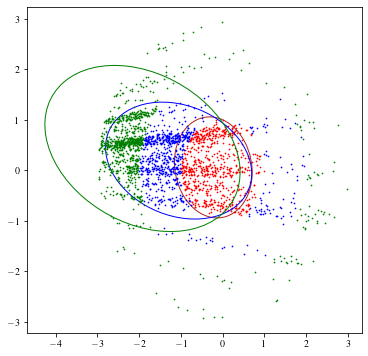

In [32]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(data1['X_1'][mask_bar1], data1['Y_1'][mask_bar1], s=0.5,c='r')
confidence_ellipse(data1['X_1'][mask_bar1], data1['Y_1'][mask_bar1],ax, n_std=2,
    label=r'$1\sigma$', edgecolor='firebrick')

ax.scatter(data2['X_1'][mask_bar2], data2['Y_1'][mask_bar2], s=0.5,c='b')
confidence_ellipse(data2['X_1'][mask_bar2], data2['Y_1'][mask_bar2],ax, n_std=2,
    label=r'$1\sigma$', edgecolor='b')

ax.scatter(data3['X_1'][mask_bar3], data3['Y_1'][mask_bar3], s=0.5,c='g')
confidence_ellipse(data3['X_1'][mask_bar3], data3['Y_1'][mask_bar3],ax, n_std=2,
    label=r'$1\sigma$', edgecolor='green')

ax.scatter(data4['X_1'][mask_bar4], data4['Y_1'][mask_bar4], s=0.5)
# confidence_ellipse(data4['X_1'][mask_bar4], data4['Y_1'][mask_bar4],ax, n_std=1,
#     label=r'$1\sigma$', edgecolor='orchid')

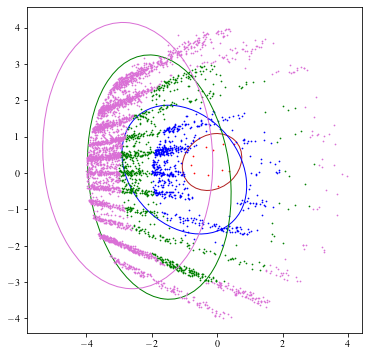

In [31]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(data1['X_1'][mask_disc1], data1['Y_1'][mask_disc1], s=0.5,c='r')
confidence_ellipse(data1['X_1'][mask_disc1], data1['Y_1'][mask_disc1],ax, n_std=2,
    label=r'$1\sigma$', edgecolor='firebrick')

ax.scatter(data2['X_1'][mask_disc2], data2['Y_1'][mask_disc2], s=0.5,c='b')
confidence_ellipse(data2['X_1'][mask_disc2], data2['Y_1'][mask_disc2],ax, n_std=2,
    label=r'$1\sigma$', edgecolor='b')

ax.scatter(data3['X_1'][mask_disc3], data3['Y_1'][mask_disc3], s=0.5,c='g')
confidence_ellipse(data3['X_1'][mask_disc3], data3['Y_1'][mask_disc3],ax, n_std=2,
    label=r'$1\sigma$', edgecolor='green')

ax.scatter(data4['X_1'][mask_disc4], data4['Y_1'][mask_disc4], s=0.5,c='orchid')
confidence_ellipse(data4['X_1'][mask_disc4], data4['Y_1'][mask_disc4],ax, n_std=2,
    label=r'$1\sigma$', edgecolor='orchid')

In [ ]:
def plot xy(x,y,masks,colores):
    
    for indx, i in enumerate(masks):
        fig, ax = plt.subplots(figsize=(6, 6))
        ax.scatter(x[indx], y[indx], s=0.5,c='r')
        confidence_ellipse(data1['X_1'][mask_disc1], data1['Y_1'][mask_disc1],ax, n_std=2,
            label=r'$1\sigma$', edgecolor='firebrick')
        
        

In [96]:
from scipy import stats

bin_feh = np.linspace(np.min(data['FE_H']),np.max(data['FE_H']),100)
bin_mgfe = np.linspace(np.min(data['MG_FE']),np.max(data['MG_FE']),100)

hist = stats.binned_statistic_2d(data['FE_H'],data['MG_FE'], data['P_knot'], statistic='mean', bins=[bin_feh,bin_mgfe])
vz_c = 0.5 * (hist.x_edge[:-1] + hist.x_edge[1:])
z_c = 0.5 * (hist.y_edge[:-1] + hist.y_edge[1:])
mesh_feh, mesh_mgfe = np.meshgrid(vz_c,z_c)
metric = hist[0].T

hist2 = stats.binned_statistic_2d(data['FE_H'],data['MG_FE'], data['P_bar'], statistic='mean', bins=[bin_feh,bin_mgfe])
vz_c2 = 0.5 * (hist2.x_edge[:-1] + hist2.x_edge[1:])
z_c2 = 0.5 * (hist2.y_edge[:-1] + hist2.y_edge[1:])
mesh_feh2, mesh_mgfe2 = np.meshgrid(vz_c2,z_c2)
metric2 = hist2[0].T

hist3 = stats.binned_statistic_2d(data['FE_H'],data['MG_FE'], data['P_disc'], statistic='mean', bins=[bin_feh,bin_mgfe])
vz_c3 = 0.5 * (hist3.x_edge[:-1] + hist3.x_edge[1:])
z_c3 = 0.5 * (hist3.y_edge[:-1] + hist3.y_edge[1:])
mesh_feh3, mesh_mgfe3 = np.meshgrid(vz_c3,z_c3)
metric3 = hist3[0].T


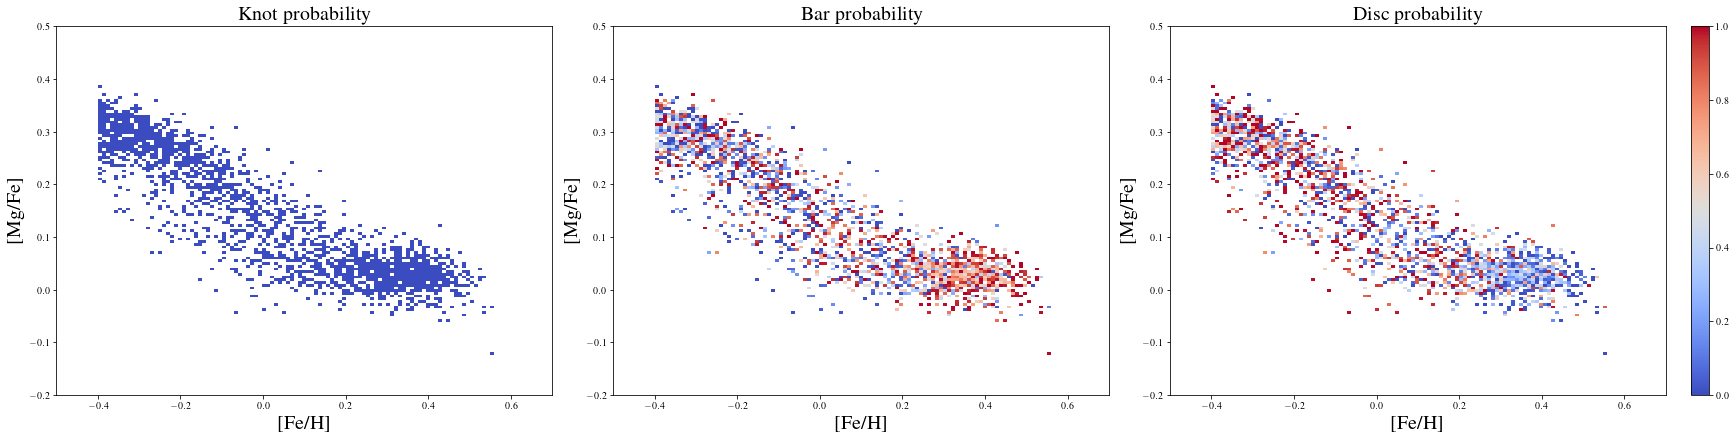

In [97]:
from matplotlib.colors import LogNorm

fig = plt.figure(constrained_layout=True,figsize=(24,6))


plt.subplot(1,3,1)
plt.title('Knot probability',fontsize=20)
plt.pcolormesh(mesh_feh,mesh_mgfe,metric,cmap='coolwarm',vmin=0.,vmax=1)
plt.xlabel('[Fe/H]',fontsize=20)
plt.ylabel('[Mg/Fe]',fontsize=20)
plt.xlim(-0.5,0.7)
plt.ylim(-0.2,0.5)

plt.subplot(1,3,2)
plt.title('Bar probability',fontsize=20)
plt.pcolormesh(mesh_feh2,mesh_mgfe2,metric2,cmap='coolwarm',vmin=0.,vmax=1)
plt.xlabel('[Fe/H]',fontsize=20)
plt.ylabel('[Mg/Fe]',fontsize=20)
plt.xlim(-0.5,0.7)
plt.ylim(-0.2,0.5)

plt.subplot(1,3,3)
plt.title('Disc probability',fontsize=20)
plt.pcolormesh(mesh_feh3,mesh_mgfe3,metric3,cmap='coolwarm',vmin=0.,vmax=1)
plt.xlabel('[Fe/H]',fontsize=20)
plt.ylabel('[Mg/Fe]',fontsize=20)
plt.xlim(-0.5,0.7)
plt.ylim(-0.2,0.5)

plt.colorbar()

Text(0, 0.5, 'Disc prob')

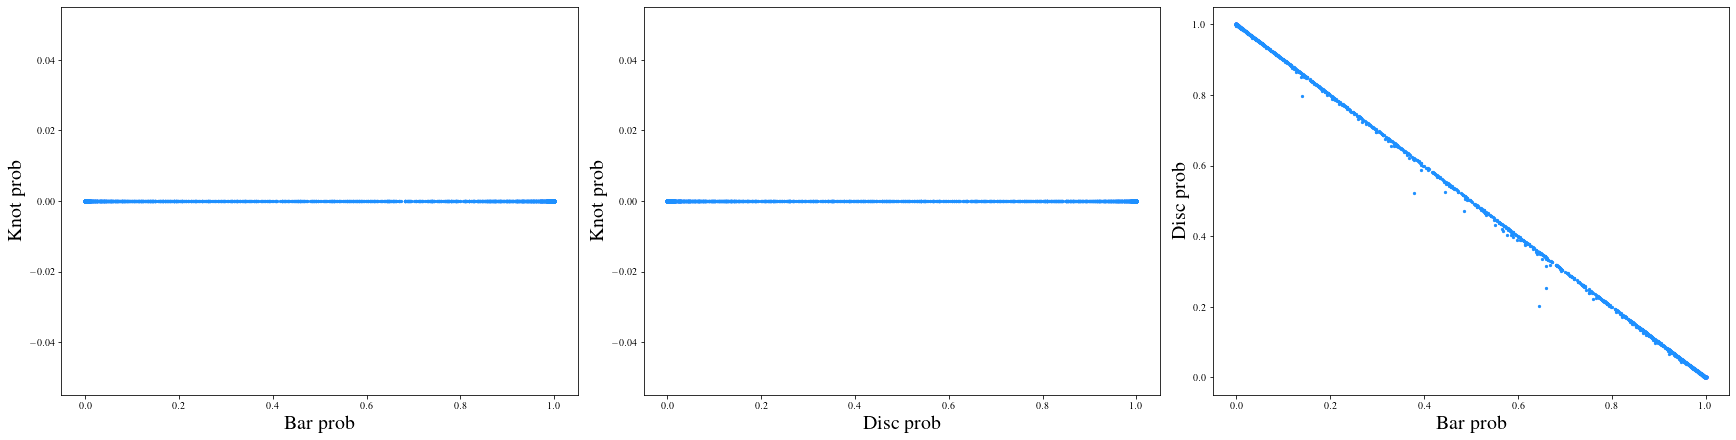

In [98]:
fig = plt.figure(constrained_layout=True,figsize=(24,6))

plt.subplot(1,3,1)
plt.scatter(data['P_bar'],data['P_knot'],s=5,c='dodgerblue')
plt.xlabel('Bar prob',fontsize=20)
plt.ylabel('Knot prob',fontsize=20)

plt.subplot(1,3,2)
plt.scatter(data['P_disc'],data['P_knot'],s=5,c='dodgerblue')
plt.xlabel('Disc prob',fontsize=20)
plt.ylabel('Knot prob',fontsize=20)

plt.subplot(1,3,3)
plt.scatter(data['P_bar'],data['P_disc'],s=5,c='dodgerblue')
plt.xlabel('Bar prob',fontsize=20)
plt.ylabel('Disc prob',fontsize=20)


# Check the MDFs and abundances

In [99]:
# run a ks test on the MDFs of the three samples

from scipy import stats

mdf_knot, bin_edges_knot = np.histogram(data['FE_H'],bins= bins_feh,weights=data['P_knot'])
mdf_bar, bin_edges_bar = np.histogram(data['FE_H'],bins= bins_feh,weights=data['P_bar'])
mdf_disc, bin_edges_disc = np.histogram(data['FE_H'],bins= bins_feh,weights=data['P_disc'])

knot_bar_ks = stats.ks_2samp(mdf_knot,mdf_bar)
knot_disc_ks = stats.ks_2samp(mdf_knot,mdf_disc)
disc_bar_ks = stats.ks_2samp(mdf_disc,mdf_bar)



In [100]:
print(knot_bar_ks)
print(knot_disc_ks)
print(disc_bar_ks)
# KS results and p-value suggest they are all different!

KstestResult(statistic=0.2, pvalue=0.9944575548290717)
KstestResult(statistic=0.2, pvalue=0.9944575548290717)
KstestResult(statistic=0.1, pvalue=1.0)


In [101]:
knot_bar_ks2 = stats.ks_2samp(data['FE_H'][mask_knot],data['FE_H'][mask_bar])
knot_disc_ks2 = stats.ks_2samp(data['FE_H'][mask_knot],data['FE_H'][mask_disc])
disc_bar_ks2 = stats.ks_2samp(data['FE_H'][mask_disc],data['FE_H'][mask_bar])

ValueError: Data passed to ks_2samp must not be empty

In [ ]:
print(knot_bar_ks2)
print(knot_disc_ks2)
print(disc_bar_ks2)

There is either metallicity gradients in the MW's bar, or the knot is the most metal-rich bit of the Bar?

# Do the same for ages

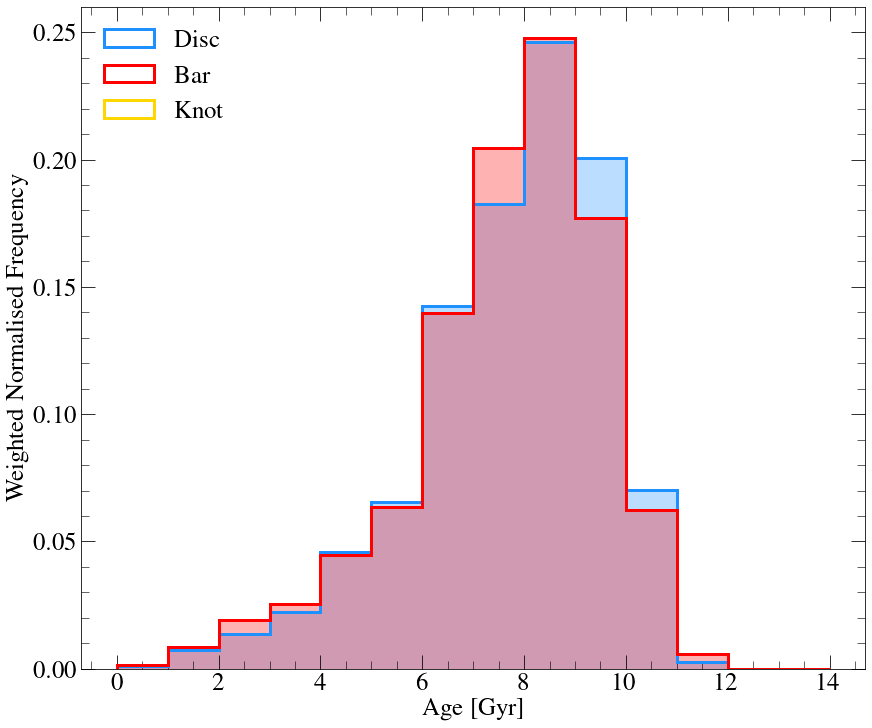

In [102]:
bins_feh = np.linspace(0,14,15)

fig = plt.figure(constrained_layout=True,figsize=(12,10))

# plt.hist(data['FE_H'],bins_feh,color='k',alpha=0.3,density=True)
# plt.hist(data['FE_H'],bins_feh,color='k',histtype='step',lw=3,density=True,label='all')

plt.hist(data['age_lowess_correct'],bins_feh,color='dodgerblue',alpha=0.3,density=True,weights=data['P_disc'])
plt.hist(data['age_lowess_correct'],bins_feh,color='dodgerblue',histtype='step',lw=3,density=True,label='Disc',weights=data['P_disc'])

plt.hist(data['age_lowess_correct'],bins_feh,color='r',alpha=0.3,density=True,weights=data['P_bar'])
plt.hist(data['age_lowess_correct'],bins_feh,color='r',histtype='step',lw=3,density=True,label='Bar',weights=data['P_bar'])

plt.hist(data['age_lowess_correct'],bins_feh,color='gold',alpha=0.3,density=True,weights=data['P_knot'])
plt.hist(data['age_lowess_correct'],bins_feh,color='gold',histtype='step',lw=3,density=True,label='Knot',weights=data['P_knot'])

plt.xlabel('Age [Gyr]',fontsize=25)
plt.ylabel('Weighted Normalised Frequency',fontsize=25)
plt.legend(loc='upper left',frameon=False,fontsize=25)

plt.tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
plt.tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()
# plt.ylim(0,2.5)


In [103]:
# run a ks test on the MDFs of the three samples

from scipy import stats

age_knot, bin_edges_knot = np.histogram(data['age_lowess_correct'],bins= bins_feh,weights=data['P_knot'])
age_bar, bin_edges_bar = np.histogram(data['age_lowess_correct'],bins= bins_feh,weights=data['P_bar'])
age_disc, bin_edges_disc = np.histogram(data['age_lowess_correct'],bins= bins_feh,weights=data['P_disc'])

knot_bar_ks = stats.ks_2samp(age_knot,age_bar)
knot_disc_ks = stats.ks_2samp(age_knot,age_disc)
disc_bar_ks = stats.ks_2samp(age_disc,age_bar)



In [104]:
print(knot_bar_ks)
print(knot_disc_ks)
print(disc_bar_ks)
# KS results and p-value suggest they are all the same!

KstestResult(statistic=0.8571428571428571, pvalue=1.8845066630771294e-05)
KstestResult(statistic=0.8571428571428571, pvalue=1.8845066630771294e-05)
KstestResult(statistic=0.07142857142857142, pvalue=1.0)


# Get the weighted Kiel diagram

In [105]:
teff_all = data['TEFF']
logg_all = data['LOGG']
data_all = np.array([teff_all,logg_all])

teff_knot = data['TEFF'][mask_knot]
logg_knot = data['LOGG'][mask_knot]
data_knot = np.array([teff_knot,logg_knot])

teff_bar = data['TEFF'][mask_bar]
logg_bar = data['LOGG'][mask_bar]
data_bar = np.array([teff_bar,logg_bar])

teff_disc = data['TEFF'][mask_disc]
logg_disc = data['LOGG'][mask_disc]
data_disc = np.array([teff_disc,logg_disc])


In [106]:
from scipy.stats import kde
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k_all = kde.gaussian_kde(data_all)
nbins=20
xi_all, yi_all = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_all = k_all(np.vstack([xi_all.flatten(), yi_all.flatten()]))

k_knot = kde.gaussian_kde(data_knot)
nbins=20
xi_knot, yi_knot = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_knot = k_knot(np.vstack([xi_knot.flatten(), yi_knot.flatten()]))

k_bar = kde.gaussian_kde(data_bar)
nbins=20
xi_bar, yi_bar = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_bar = k_bar(np.vstack([xi_bar.flatten(), yi_bar.flatten()]))

k_disc = kde.gaussian_kde(data_disc)
nbins=20
xi_disc, yi_disc = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_disc = k_disc(np.vstack([xi_disc.flatten(), yi_disc.flatten()]))


ValueError: `dataset` input should have multiple elements.

(3.0, 0.0)

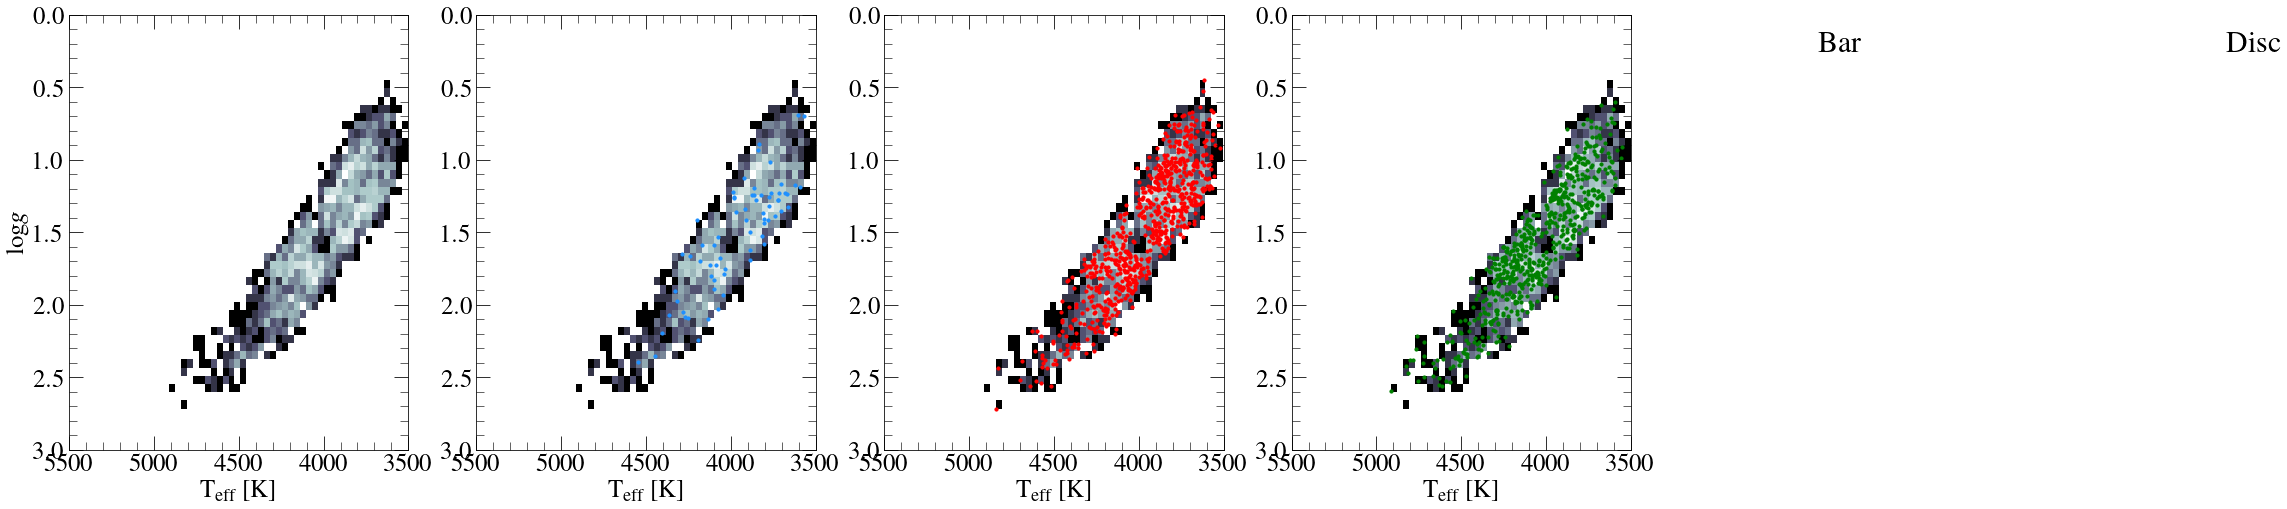

In [73]:
from matplotlib.colors import LogNorm
colores1 = ['k','dimgray','gray','silver','gainsboro','snow']
colores = ['navy','b','royalblue','dodgerblue','skyblue','cyan']
colores2 = ['maroon','r','salmon','coral','lightsalmon','peachpuff']
colores3 = ['darkgreen','g','forestgreen','limegreen','springgreen','lime']

fig, axes = plt.subplots(1, 4,figsize=(28,8),facecolor='white')


axes[0].text(0.3,0.25,'All',fontsize=30)
axes[0].hist2d(data['TEFF'],data['LOGG'],bins=40,cmap='bone',norm=LogNorm())
# color = axes[0].imshow(np.rot90(zi_all.reshape(xi_all.shape)),cmap='binary',extent=[-4,4,-4,4])
# axes[0].contour(xi_all, yi_all, zi_all.reshape(xi_all.shape),levels=6,colors=colores1,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[0].set_xlabel('T$_{\mathrm{eff}}$ [K]',fontsize=25)
axes[0].set_ylabel('log$g$',fontsize=25)
axes[0].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[0].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[0].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[0].minorticks_on()
# axes[0].colorbar(color, aspect=40)
# cax = axes[0].inset_axes([0.15, 1.08, 0.7, 0.05])
# cbar = fig.colorbar(color,ax=axes[0],cax=cax,orientation='horizontal')
# cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
# cbar.ax.tick_params(labelsize=21)
# cbar.ax.xaxis.set_ticks_position('top')
# cbar.ax.xaxis.set_label_position('top')
axes[0].set_xlim(5500,3500)
axes[0].set_ylim(3,0)

# axes[0].subplot(1,3,1)
# axes[0].title('Knot',fontsize=20)
axes[1].text(0.3,0.25,'Knot',fontsize=30)
axes[1].hist2d(data['TEFF'],data['LOGG'],bins=40,cmap='bone',norm=LogNorm())
# color = axes[1].imshow(np.rot90(zi_knot.reshape(xi_knot.shape)),cmap='Blues',extent=[-4,4,-4,4])
# axes[1].contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
axes[1].scatter(data['TEFF'][mask_knot],data['LOGG'][mask_knot],s=10,c='dodgerblue')
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[1].set_xlabel('T$_{\mathrm{eff}}$ [K]',fontsize=25)
# axes[1].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[1].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[1].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[1].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[1].minorticks_on()
# axes[0].colorbar(color, aspect=40)
# cax = axes[1].inset_axes([0.15, 1.08, 0.7, 0.05])
# cbar = fig.colorbar(color,ax=axes[1],cax=cax,orientation='horizontal')
# cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
# cbar.ax.tick_params(labelsize=21)
# cbar.ax.xaxis.set_ticks_position('top')
# cbar.ax.xaxis.set_label_position('top')
axes[1].set_xlim(5500,3500)
axes[1].set_ylim(3,0)

# axes[1].subplot(1,3,2)
# axes[1].set_title('Bar',fontsize=20)
axes[2].text(0.3,0.25,'Bar',fontsize=30)
axes[2].hist2d(data['TEFF'],data['LOGG'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
axes[2].scatter(data['TEFF'][mask_bar],data['LOGG'][mask_bar],s=10,c='r')
# color2 = axes[2].imshow(np.rot90(zi_bar.reshape(xi_bar.shape)),cmap='Reds',extent=[-4,4,-4,4])
# axes[2].contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[2].set_xlabel('T$_{\mathrm{eff}}$ [K]',fontsize=25)
# axes[2].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[2].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[2].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[2].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[2].minorticks_on()
axes[2].set_xlim(5500,3500)
axes[2].set_ylim(3,0)
# axes[1].colorbar(color2, aspect=40)
# cax = axes[2].inset_axes([0.15, 1.08, 0.7, 0.05])
# cbar = fig.colorbar(color2,ax=axes[2],cax=cax,orientation='horizontal')
# cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
# cbar.ax.tick_params(labelsize=21)
# cbar.ax.xaxis.set_ticks_position('top')
# cbar.ax.xaxis.set_label_position('top')

# axes[2].subplot(1,3,3)
# axes[2].set_title('Disc',fontsize=25)
axes[3].text(0.3,0.25,'Disc',fontsize=30)
axes[3].hist2d(data['TEFF'],data['LOGG'],bins=40,cmap='bone',norm=LogNorm())
axes[3].scatter(data['TEFF'][mask_disc],data['LOGG'][mask_disc],s=10,c='g')
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# color3 = axes[3].imshow(np.rot90(zi_disc.reshape(xi_disc.shape)),cmap='Greens',extent=[-4,4,-4,4])
# axes[3].contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
# plt.xlim(-0.6,0.6)
# plt.ylim(-0.25,0.5)
axes[3].set_xlabel('T$_{\mathrm{eff}}$ [K]',fontsize=25)
# axes[3].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[3].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[3].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[3].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[3].minorticks_on()
axes[3].set_xlim(5500,3500)
axes[3].set_ylim(3,0)

# cax = axes[3].inset_axes([0.15, 1.08, 0.7, 0.05])
# cbar = fig.colorbar(color3,ax=axes[3],cax=cax,orientation='horizontal')
# cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
# cbar.ax.tick_params(labelsize=21)
# cbar.ax.xaxis.set_ticks_position('top')
# cbar.ax.xaxis.set_label_position('top')


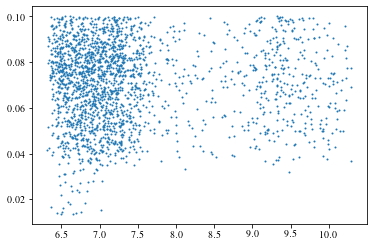

In [74]:
# good_idx = ((np.abs(astronn_VAC_f['dist_model_error']/astronn_VAC_f['dist'])<0.5) & (astronn_VAC_f['dist']<2e10) & (astronn_VAC_f['fakemag']<500) & (astronn_VAC_f['LOGG_ERR']<0.2))
# plt.hist(data['fakemag'])
plt.scatter(data['weighted_dist']/1000,data['weighted_dist_error']/data['weighted_dist'],s=1)


# Get the weighted Tinsley Diagram for stars with 0.5 < logg < 1.5

In [75]:
fe_all = data['FE_H'][(data['LOGG']<1.5)]
mg_all = data['MG_FE'][(data['LOGG']<1.5)]
data_all = np.array([fe_all,mg_all])

fe_knot = data['FE_H'][mask_knot&(data['LOGG']<1.5)]
mg_knot = data['MG_FE'][mask_knot&(data['LOGG']<1.5)]
data_knot = np.array([fe_knot,mg_knot])

fe_bar = data['FE_H'][mask_bar&(data['LOGG']<1.5)]
mg_bar = data['MG_FE'][mask_bar&(data['LOGG']<1.5)]
data_bar = np.array([fe_bar,mg_bar])

fe_disc = data['FE_H'][mask_disc&(data['LOGG']<1.5)]
mg_disc = data['MG_FE'][mask_disc&(data['LOGG']<1.5)]
data_disc = np.array([fe_disc,mg_disc])


In [76]:
from scipy.stats import kde
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k_all = kde.gaussian_kde(data_all)
nbins=20
xi_all, yi_all = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_all = k_all(np.vstack([xi_all.flatten(), yi_all.flatten()]))

k_knot = kde.gaussian_kde(data_knot)
nbins=20
xi_knot, yi_knot = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_knot = k_knot(np.vstack([xi_knot.flatten(), yi_knot.flatten()]))

k_bar = kde.gaussian_kde(data_bar)
nbins=20
xi_bar, yi_bar = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_bar = k_bar(np.vstack([xi_bar.flatten(), yi_bar.flatten()]))

k_disc = kde.gaussian_kde(data_disc)
nbins=20
xi_disc, yi_disc = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_disc = k_disc(np.vstack([xi_disc.flatten(), yi_disc.flatten()]))


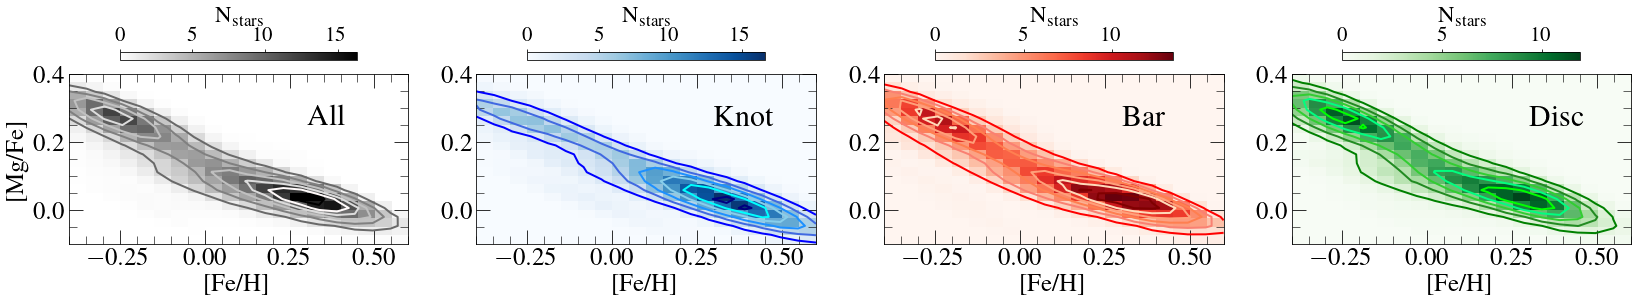

In [77]:
from matplotlib.colors import LogNorm
colores1 = ['k','dimgray','gray','silver','gainsboro','snow']
colores = ['navy','b','royalblue','dodgerblue','skyblue','cyan']
colores2 = ['maroon','r','salmon','coral','lightsalmon','peachpuff']
colores3 = ['darkgreen','g','forestgreen','limegreen','springgreen','lime']

fig, axes = plt.subplots(1, 4,figsize=(28,8),facecolor='white')


axes[0].text(0.3,0.25,'All',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[0].imshow(np.rot90(zi_all.reshape(xi_all.shape)),cmap='binary',extent=[-0.4, 0.6,-0.1, 0.4])
axes[0].contour(xi_all, yi_all, zi_all.reshape(xi_all.shape),levels=6,colors=colores1,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[0].set_xlabel('[Fe/H]',fontsize=25)
axes[0].set_ylabel('[Mg/Fe]',fontsize=25)
axes[0].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[0].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[0].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[0].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[0].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[0],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[1].subplot(1,3,1)
# axes[1].title('Knot',fontsize=20)
axes[1].text(0.3,0.25,'Knot',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[1].imshow(np.rot90(zi_knot.reshape(xi_knot.shape)),cmap='Blues',extent=[-0.4, 0.6,-0.1, 0.4])
axes[1].contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[1].set_xlabel('[Fe/H]',fontsize=25)
# axes[1].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[1].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[1].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[1].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[1].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[1].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[1],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[1].subplot(1,3,2)
# axes[1].set_title('Bar',fontsize=20)
axes[2].text(0.3,0.25,'Bar',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
color2 = axes[2].imshow(np.rot90(zi_bar.reshape(xi_bar.shape)),cmap='Reds',extent=[-0.4, 0.6,-0.1, 0.4])
axes[2].contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[2].set_xlabel('[Fe/H]',fontsize=25)
# axes[2].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[2].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[2].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[2].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[2].minorticks_on()

# axes[1].colorbar(color2, aspect=40)
cax = axes[2].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color2,ax=axes[2],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[2].subplot(1,3,3)
# axes[2].set_title('Disc',fontsize=25)
axes[3].text(0.3,0.25,'Disc',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
color3 = axes[3].imshow(np.rot90(zi_disc.reshape(xi_disc.shape)),cmap='Greens',extent=[-0.4, 0.6,-0.1, 0.4])
axes[3].contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
# plt.xlim(-0.6,0.6)
# plt.ylim(-0.25,0.5)
axes[3].set_xlabel('[Fe/H]',fontsize=25)
# axes[3].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[3].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[3].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[3].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[3].minorticks_on()

cax = axes[3].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color3,ax=axes[3],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')


In [82]:
# LOAD THE DATA
# this is the latest APOGEE catalogue that APW sent me with orbital properties determined using StarHorse distances
path2 = '/Users/dhortadarrington/Documents/Master/data/dr17_dr3_McMillan_astroNN_rev1.fits'
tb2 = fits.open(path2)
data2 = tb2[1].data 


In [83]:
#  check the tinsley diagram for thin disc in solar neighbourhood
zgal2 = data2['Zgal']*8.178
Rgal2 = data2['Rgal']*8.178
fe_disc_solar = data2['FE_H'][(Rgal2<9.)&(Rgal2>7.)&(data2['LOGG']<1.5)&(data2['FE_H']>-0.8)&(data2['LOGG']>0.5)&(np.abs(zgal2)<0.3)]
mg_disc_solar = data2['MG_FE'][(Rgal2<9.)&(Rgal2>7.)&(data2['LOGG']<1.5)&(data2['FE_H']>-0.8)&(data2['LOGG']>0.5)&(np.abs(zgal2)<0.3)]
data_disc_solar = np.array([fe_disc_solar,mg_disc_solar])



In [84]:
k_disc_solar = kde.gaussian_kde(data_disc_solar)
nbins=20
xi_disc_solar, yi_disc_solar = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_disc_solar = k_disc_solar(np.vstack([xi_disc_solar.flatten(), yi_disc_solar.flatten()]))


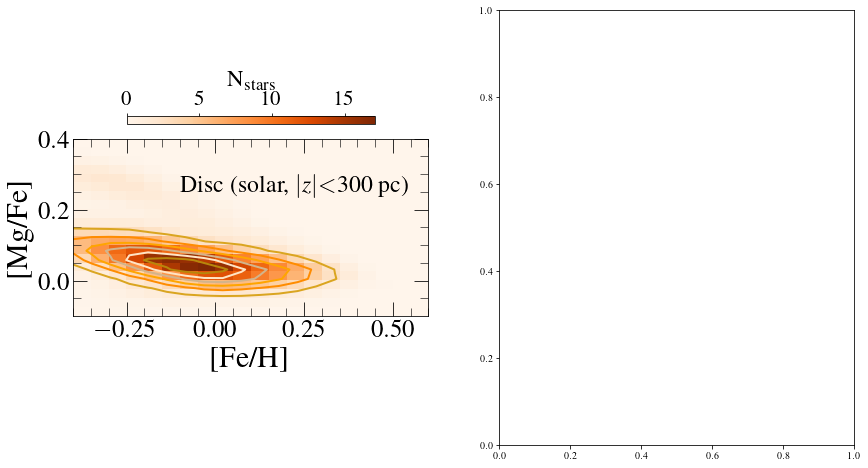

In [85]:
colores4 = ['darkgoldenrod','goldenrod','darkorange','orange','tan','bisque']

fig, axes = plt.subplots(1, 2,figsize=(14,8),facecolor='white')


axes[0].text(-0.1,0.25,'Disc (solar, $|z|$$<$300 pc)',fontsize=24)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[0].imshow(np.rot90(zi_disc_solar.reshape(xi_disc_solar.shape)),cmap='Oranges',extent=[-0.4, 0.6,-0.1, 0.4])
axes[0].contour(xi_disc_solar, yi_disc_solar, zi_disc_solar.reshape(xi_disc_solar.shape),levels=6,colors=colores4,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[0].set_xlabel('[Fe/H]',fontsize=30)
axes[0].set_ylabel('[Mg/Fe]',fontsize=30)
axes[0].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[0].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[0].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[0].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[0].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[0],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# Do it also for all stars with $|$Z$|$$<$0.3 kpc

In [89]:
zgal = (data['Zgal']*8.178)
Rgal = data['Rgal']*8.178


In [90]:
mask_z = (np.abs(zgal)<0.3)&(data['LOGG']<1.5)

(0.0, 4.5)

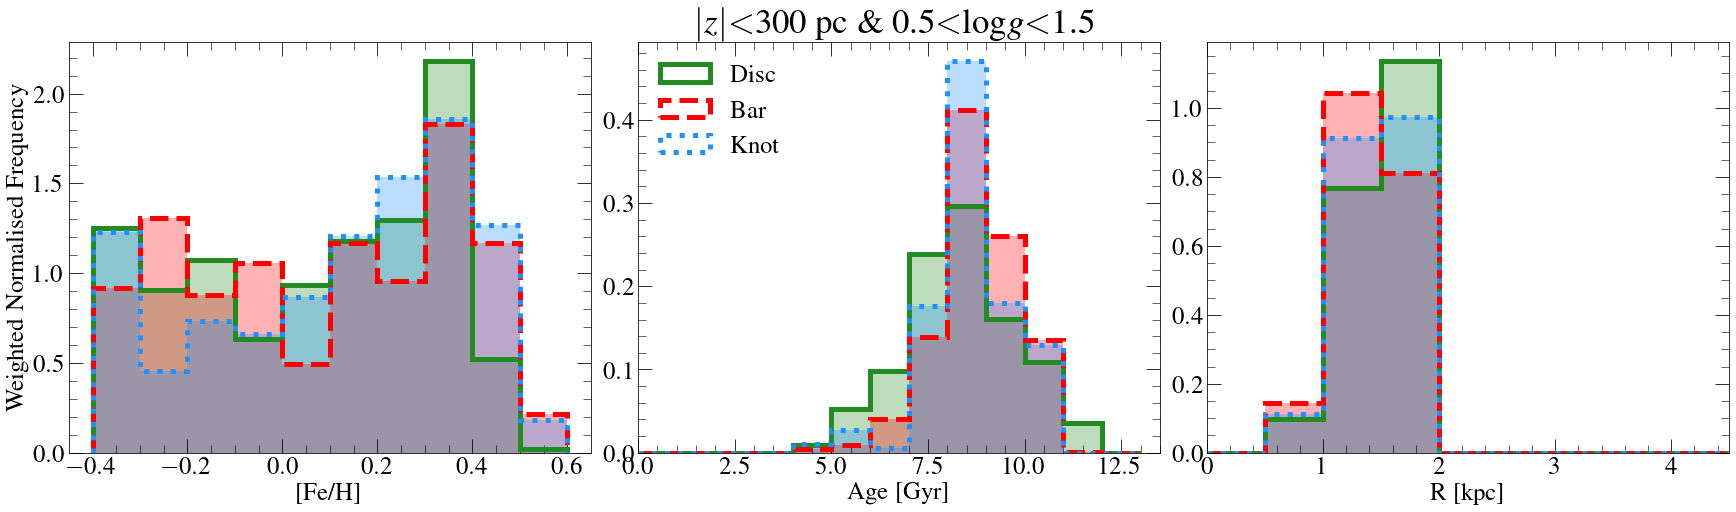

In [91]:
plt.figure(figsize=(24,7),constrained_layout=True,facecolor='white')


plt.subplot(1,3,1)
bins_feh = np.linspace(-0.4,0.6,11)

# plt.hist(data['FE_H'],bins_feh,color='k',alpha=0.3,density=True)
# plt.hist(data['FE_H'],bins_feh,color='k',histtype='step',lw=3,density=True,label='all')

plt.hist(data['FE_H'][mask_z],bins_feh,color='forestgreen',alpha=0.3,density=True,weights=data['P_disc'][mask_z])
plt.hist(data['FE_H'][mask_z],bins_feh,color='forestgreen',histtype='step',lw=5,density=True,label='Disc',weights=data['P_disc'][mask_z])

plt.hist(data['FE_H'][mask_z],bins_feh,color='r',alpha=0.3,density=True,weights=data['P_bar'][mask_z])
plt.hist(data['FE_H'][mask_z],bins_feh,color='r',histtype='step',lw=5,density=True,label='Bar',weights=data['P_bar'][mask_z],ls='dashed')

plt.hist(data['FE_H'][mask_z],bins_feh,color='dodgerblue',alpha=0.3,density=True,weights=data['P_knot'][mask_z])
plt.hist(data['FE_H'][mask_z],bins_feh,color='dodgerblue',histtype='step',lw=5,density=True,label='Knot',weights=data['P_knot'][mask_z],ls='dotted')

plt.xlabel('[Fe/H]',fontsize=25)
plt.ylabel('Weighted Normalised Frequency',fontsize=25)
# plt.legend(loc='upper left',frameon=False,fontsize=25)

plt.tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
plt.tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()
# plt.ylim(0,2.5)

plt.subplot(1,3,2)
plt.title(r'$|z|$$<$300 pc $\&$ 0.5$<$log$g$$<$1.5',fontsize=35)
bins_feh = np.linspace(0,13,14)

# plt.hist(data['FE_H'],bins_feh,color='k',alpha=0.3,density=True)
# plt.hist(data['FE_H'],bins_feh,color='k',histtype='step',lw=3,density=True,label='all')

plt.hist(data['age_lowess_correct'][mask_z],bins_feh,color='forestgreen',alpha=0.3,density=True,weights=data['P_disc'][mask_z])
plt.hist(data['age_lowess_correct'][mask_z],bins_feh,color='forestgreen',histtype='step',lw=5,density=True,label='Disc',weights=data['P_disc'][mask_z])

plt.hist(data['age_lowess_correct'][mask_z],bins_feh,color='r',alpha=0.3,density=True,weights=data['P_bar'][mask_z])
plt.hist(data['age_lowess_correct'][mask_z],bins_feh,color='r',histtype='step',lw=5,density=True,label='Bar',weights=data['P_bar'][mask_z],ls='dashed')

plt.hist(data['age_lowess_correct'][mask_z],bins_feh,color='dodgerblue',alpha=0.3,density=True,weights=data['P_knot'][mask_z])
plt.hist(data['age_lowess_correct'][mask_z],bins_feh,color='dodgerblue',histtype='step',lw=5,density=True,label='Knot',weights=data['P_knot'][mask_z],ls='dotted')

plt.xlabel('Age [Gyr]',fontsize=25)
# plt.ylabel('Weighted Normalised Frequency',fontsize=25)
plt.legend(loc='upper left',frameon=False,fontsize=25)

plt.tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
plt.tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(0,13.5)

plt.subplot(1,3,3)
bins_feh = np.linspace(0,5,11)
# plt.hist(data['FE_H'],bins_feh,color='k',alpha=0.3,density=True)
# plt.hist(data['FE_H'],bins_feh,color='k',histtype='step',lw=3,density=True,label='all')

plt.hist(Rgal[mask_z],bins_feh,color='forestgreen',alpha=0.3,density=True,weights=data['P_disc'][mask_z])
plt.hist(Rgal[mask_z],bins_feh,color='forestgreen',histtype='step',lw=5,density=True,label='Disc',weights=data['P_disc'][mask_z])

plt.hist(Rgal[mask_z],bins_feh,color='r',alpha=0.3,density=True,weights=data['P_bar'][mask_z])
plt.hist(Rgal[mask_z],bins_feh,color='r',histtype='step',lw=5,density=True,label='Bar',weights=data['P_bar'][mask_z],ls='dashed')

plt.hist(Rgal[mask_z],bins_feh,color='dodgerblue',alpha=0.3,density=True,weights=data['P_knot'][mask_z])
plt.hist(Rgal[mask_z],bins_feh,color='dodgerblue',histtype='step',lw=5,density=True,label='Knot',weights=data['P_knot'][mask_z],ls='dotted')

plt.xlabel('R [kpc]',fontsize=25)
# plt.ylabel('Weighted Normalised Frequency',fontsize=25)
# plt.legend(loc='upper right',frameon=False,fontsize=25)

plt.tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
plt.tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(0,4.5)


In [92]:
# run a ks test on the MDFs of the three samples

from scipy import stats

age_knot, bin_edges_knot = np.histogram(data['age_lowess_correct'][mask_z],bins= bins_feh,weights=data['P_knot'][mask_z])
age_bar, bin_edges_bar = np.histogram(data['age_lowess_correct'][mask_z],bins= bins_feh,weights=data['P_bar'][mask_z])
age_disc, bin_edges_disc = np.histogram(data['age_lowess_correct'][mask_z],bins= bins_feh,weights=data['P_disc'][mask_z])

knot_bar_ks = stats.ks_2samp(age_knot,age_bar)
knot_disc_ks = stats.ks_2samp(age_knot,age_disc)
disc_bar_ks = stats.ks_2samp(age_disc,age_bar)


In [93]:
print(knot_bar_ks)
print(knot_disc_ks)
print(disc_bar_ks)
# KS results and p-value suggest they are all the same!

KstestResult(statistic=0.1, pvalue=1.0)
KstestResult(statistic=0.1, pvalue=1.0)
KstestResult(statistic=0.1, pvalue=1.0)
